In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.3.4     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Read Data

In [2]:
modeldata <- read.csv("model1.csv", stringsAsFactors = F)

In [3]:
unique_value = apply(modeldata, 2, function(x)length(unique(x)))

### loan_status--target

In [108]:
table(modeldata$loan_status)


Charged Off     Default  Fully Paid 
     116861          21      435223 

In [4]:
modeldata$fully_paid <-ifelse(modeldata$loan_status == 'Fully Paid',1,0)

In [5]:
table(modeldata$fully_paid)


     0      1 
116882 435223 

### Purpose

In [6]:
g1 = modeldata %>% filter(fully_paid == 0) %>% group_by(purpose) %>% summarise(default_count = n())
g2 = modeldata %>% group_by(purpose) %>% summarise(count = n())
g3 = g2 %>% left_join(g1) %>% mutate(default_rate = 100*default_count/count) %>% select(purpose,count,default_count,default_rate)

Warning message:
"package 'bindrcpp' was built under R version 3.4.3"Joining, by = "purpose"


In [8]:
g3[order(-g3$default_rate),]

purpose,count,default_count,default_rate
small_business,5451,1684,30.89341
moving,3204,822,25.65543
renewable_energy,312,77,24.67949
house,2287,547,23.91780
medical,5126,1177,22.96137
other,25103,5743,22.87774
debt_consolidation,334564,74556,22.28453
vacation,2929,598,20.41652
major_purchase,9654,1934,20.03315
home_improvement,32342,6190,19.13920


In [7]:
quantile(g3$default_rate,na.rm = T)

0%      25%      50%      75%     100% 
15.23438 19.13920 22.28453 23.91780 30.89341

In [8]:
#collapsing
modeldata$purpose_1 <- 
  ifelse(modeldata$purpose %in% g3$purpose[which(g3$default_rate <= 22.28)],'low',
  ifelse(modeldata$purpose %in% g3$purpose[which(g3$default_rate <= 23.91)],'medium','high'))

### revol_util

In [9]:
num.NA = sort(sapply(modeldata,function(x) {sum(is.na(x))}),decreasing = TRUE)

In [10]:
modeldata$revol_util[is.na(modeldata$revol_util)] = median(modeldata$revol_util,na.rm =  T)

### Home Ownership

In [11]:
modeldata$home_ownership_1 = with(modeldata,ifelse(home_ownership %in% c('ANY','NONE','OTHER'),'other',modeldata$home_ownership))

In [12]:
table(modeldata$home_ownership)


     ANY MORTGAGE     NONE    OTHER      OWN     RENT 
       1   284170       32       40    53277   214585 

In [13]:
table(modeldata$home_ownership_1)


MORTGAGE    other      OWN     RENT 
  284170       73    53277   214585 

### emp_length

In [14]:
table(modeldata$emp_length)


           < 1 year    1 year 10+ years   2 years   3 years   4 years   5 years 
    27856     42533     35267    181497     49150     43553     32018     34357 
  6 years   7 years   8 years   9 years 
    27391     28912     27941     21630 

In [15]:
e1 = modeldata %>% filter(fully_paid == 0) %>% group_by(emp_length) %>% summarise(default_count = n())
e2 = modeldata %>% group_by(emp_length) %>% summarise(count = n())
e3 = e2 %>% left_join(e1) %>% mutate(default_rate = 100*default_count/count) %>% select(emp_length,count,default_count,default_rate)

Joining, by = "emp_length"


In [16]:
e3[order(-e3$default_rate),]

emp_length,count,default_count,default_rate
,27856,7697,27.63139
< 1 year,42533,9376,22.04406
9 years,21630,4723,21.83541
8 years,27941,6024,21.55972
1 year,35267,7591,21.52437
4 years,32018,6732,21.02567
3 years,43553,9139,20.98363
6 years,27391,5725,20.90103
2 years,49150,10223,20.79959
5 years,34357,7142,20.78761


In [17]:
quantile(e3$default_rate,na.rm = T)

0%      25%      50%      75%     100% 
20.11603 20.79660 21.00465 21.62864 27.63139

In [18]:
#collapsing
modeldata$emp_length_1 <-ifelse(modeldata$emp_length %in% e3$emp_length[which(e3$default_rate <= 21.00)],'low','high')

In [ ]:
# anova analysis on different groups
#aov.res = aov(int_rate ~ factor(addr_state), na.action = na.omit, data = loan)
#summary(aov.res)

# addr_state

In [19]:
a1 = modeldata %>% filter(fully_paid == 0) %>% group_by(addr_state) %>% summarise(default_count = n())
a2 = modeldata %>% group_by(addr_state) %>% summarise(count = n())
a3 = a2 %>% left_join(a1) %>% mutate(default_rate = 100*default_count/count) %>% select(addr_state,count,default_count,default_rate)

Joining, by = "addr_state"


In [20]:
a3[order(-a3$default_rate),]

addr_state,count,default_count,default_rate
IA,2,1,50.00000
NE,588,190,32.31293
MS,2255,651,28.86918
ND,209,56,26.79426
AL,7130,1818,25.49790
OK,5195,1299,25.00481
AR,4317,1074,24.87839
LA,6462,1599,24.74466
NV,8361,1990,23.80098
TN,8483,2017,23.77697


In [21]:
quantile(a3$default_rate,na.rm = T)

0%      25%      50%      75%     100% 
13.96669 18.82077 21.50549 22.96958 50.00000

In [22]:
#collapsing
modeldata$addr_state_1 <-ifelse(modeldata$addr_state %in% a3$addr_state[which(a3$default_rate <= 18.82)],'low',
                                ifelse(modeldata$addr_state %in% a3$addr_state[which(a3$default_rate <= 22.96)],'medium','high'))

# Scaling data features

In [ ]:
#getCharColumns<-function(t){
#    tn = sapply(t,function(x){is.character(x)})
#    return(names(tn)[which(tn)])
#}
#getNumericColumns<-function(t){
#    tn = sapply(t,function(x){is.numeric(x)})
#    return(names(tn)[which(tn)])
#}

In [76]:
#features = modeldata[,c('mths_since_recent_inq' ,'mo_sin_old_rev_tl_op','inq_last_6mths','int_rate','grade', 'home_ownership_1','emp_length_1', 'dti','term', 'purpose_1','last_fico_range_low','installment','revol_bal','revol_util','pct_tl_nvr_dlq','annual_inc','delinq_2yrs','delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','addr_state_1')]

In [77]:
#library(scales)

In [78]:
#numeric = features[getNumericColumns(features)]

In [79]:
#scaled.numeric <- scale(numeric)

In [80]:
#char = features[getCharColumns(features)]

In [89]:
#modeldata2 = cbind(fully_paid = modeldata$fully_paid,scaled.numeric, char)

### split the data into training and testing data

In [405]:
modeldata2 = modeldata[,c('fully_paid','mths_since_recent_inq' ,'mo_sin_old_rev_tl_op','inq_last_6mths','int_rate','grade', 'home_ownership_1','emp_length_1', 'dti','term', 'purpose_1','last_fico_range_low','installment','revol_bal','revol_util','pct_tl_nvr_dlq','annual_inc','delinq_2yrs','delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','addr_state_1')]

In [406]:
set.seed(1)
train.ind <- sample(1:dim(modeldata2)[1], 0.7 * dim(modeldata2)[1])
train <- modeldata2[train.ind, ]
test <- modeldata2[-train.ind, ]

In [392]:
model1 <- glm(fully_paid ~.,family=binomial(link='logit'),data=train)

In [138]:
summary(model1)


Call:
glm(formula = fully_paid ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7307   0.0922   0.2332   0.4050   5.5895  

Coefficients:
                             Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                -1.284e+01  1.089e-01 -117.962  < 2e-16 ***
mths_since_recent_inq       6.295e-03  1.228e-03    5.127 2.95e-07 ***
mo_sin_old_rev_tl_op       -1.253e-03  6.438e-05  -19.458  < 2e-16 ***
inq_last_6mths             -9.554e-03  6.629e-03   -1.441  0.14952    
int_rate                    7.135e-02  4.410e-03   16.177  < 2e-16 ***
gradeB                     -2.875e-01  2.862e-02  -10.046  < 2e-16 ***
gradeC                     -5.838e-01  3.727e-02  -15.662  < 2e-16 ***
gradeD                     -8.539e-01  4.921e-02  -17.350  < 2e-16 ***
gradeE                     -1.083e+00  6.131e-02  -17.669  < 2e-16 ***
gradeF                     -1.287e+00  7.910e-02  -16.270  < 2e-16 ***

**According to the result, generate new feature

In [139]:
getIndexsOfColumns <- function(t,column_names){
    return(match(column_names,colnames(t)))
}

In [140]:
fitted.results = predict(model1,newx = as.matrix(test.sub[-getIndexsOfColumns(test.sub,"fully_paid")]),type="response")

In [218]:
fitted.results = ifelse(fitted.results > 0.5,1,0)
misClasificError <- mean(fitted.results != test.sub$fully_paid)
print(paste('Accuracy is ',1-misClasificError))

Warning message in fitted.results != test.sub$fully_paid:
"longer object length is not a multiple of shorter object length"

[1] "Accuracy is  0.688914878917803"


# glmnet

In [142]:
library(glmnet)

In [407]:
ind = train[, -1]
ind <- model.matrix( ~., ind)
dep <- train[, 1]
fit <- glmnet(x=ind, y=dep) # default is alpha = 1, lasso

In [226]:
test.ind = test[, -1]
test.ind <- model.matrix( ~., test.ind)
test.dep <- test[, 1]

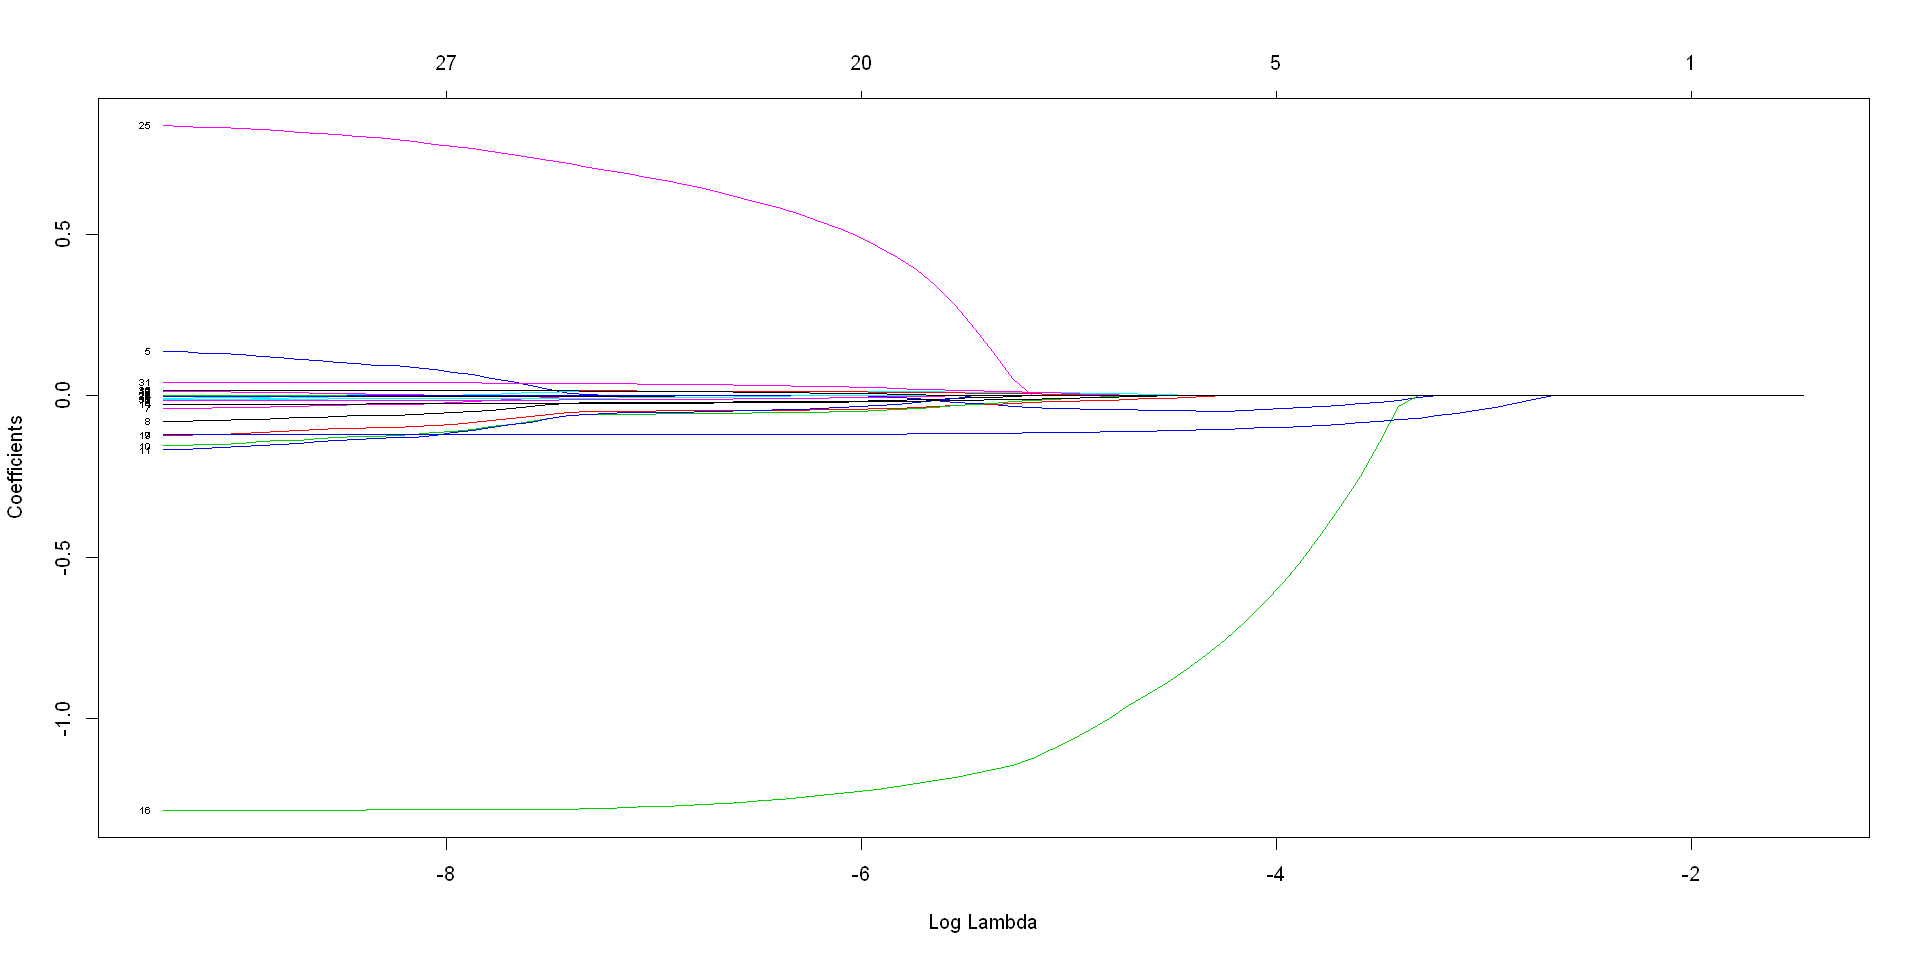

In [144]:
options(repr.plot.width=16, repr.plot.height=8)
plot(fit, xvar = "lambda", label = T)

In [145]:
vnat=coef(fit)

In [146]:
vnat

   [[ suppressing 86 column names 's0', 's1', 's2' ... ]]


33 x 86 sparse Matrix of class "dgCMatrix"
                                                                           
(Intercept)                0.7888649 0.6855890256 0.5914878587 0.5057463801
(Intercept)                .         .            .            .           
mths_since_recent_inq      .         .            .            .           
mo_sin_old_rev_tl_op       .         .            .            .           
inq_last_6mths             .         .            .            .           
int_rate_1                 .         .            .            .           
gradeB                     .         .            .            .           
gradeC                     .         .            .            .           
gradeD                     .         .            .            .           
gradeE                     .         .            .            .           
gradeF                     .         .            .            .           
gradeG                     .         .       

In [147]:
vnat <- vnat[-c(1,2), ncol(vnat)] # remove the intercept, and get the coefficients at the end of the path

In [148]:
vnat 

mths_since_recent_inq       mo_sin_old_rev_tl_op 
              7.197874e-04              -8.143941e-05 
            inq_last_6mths                 int_rate_1 
             -7.646941e-04               1.376794e-01 
                    gradeB                     gradeC 
             -7.717186e-03              -4.011308e-02 
                    gradeD                     gradeE 
             -7.988676e-02              -1.227589e-01 
                    gradeF                     gradeG 
             -1.548941e-01              -1.673598e-01 
     home_ownership_1other        home_ownership_1OWN 
             -1.487509e-02              -1.502394e-02 
      home_ownership_1RENT            emp_length_1low 
             -2.581267e-02               1.581865e-02 
                     dti_1             term 60 months 
             -1.283105e+00              -1.210858e-01 
              purpose_1low            purpose_1medium 
              1.295323e-02               1.327968e-02 
       last_fico_range_low                installment 
              1.698487e-03              -8.646974e-05 
                 revol_bal                 revol_util 
              2.052671e-07               4.133947e-04 
            pct_tl_nvr_dlq               annual_inc_1 
             -8.123136e-04               8.360207e-01 
               delinq_2yrs                delinq_amnt 
             -2.474131e-03               6.795542e-08 
            acc_now_delinq   chargeoff_within_12_mths 
             -6.025177e-04              -1.643724e-03 
collections_12_mths_ex_med            addr_state_1low 
             -1.028205e-02               4.148058e-02 
        addr_state_1medium 
              1.714641e-02

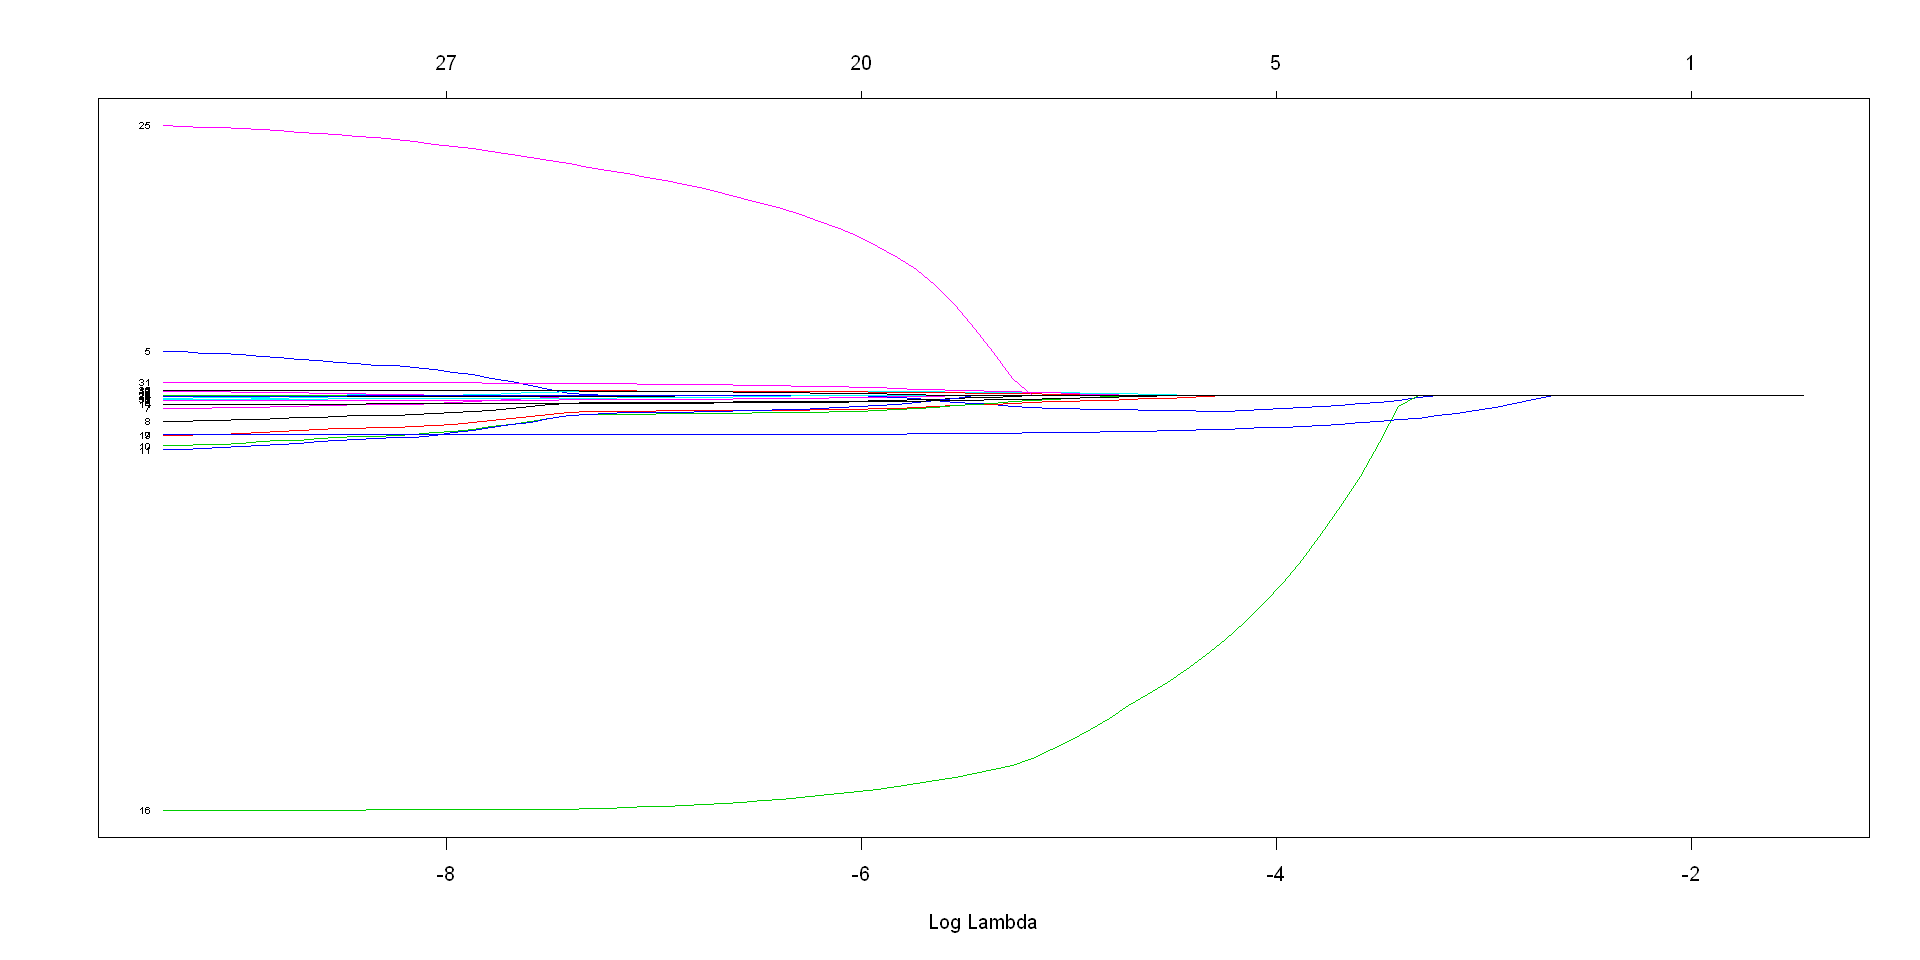

In [149]:
plot(fit, xvar = 'lambda', label = T, yaxt='n', ylab = "")

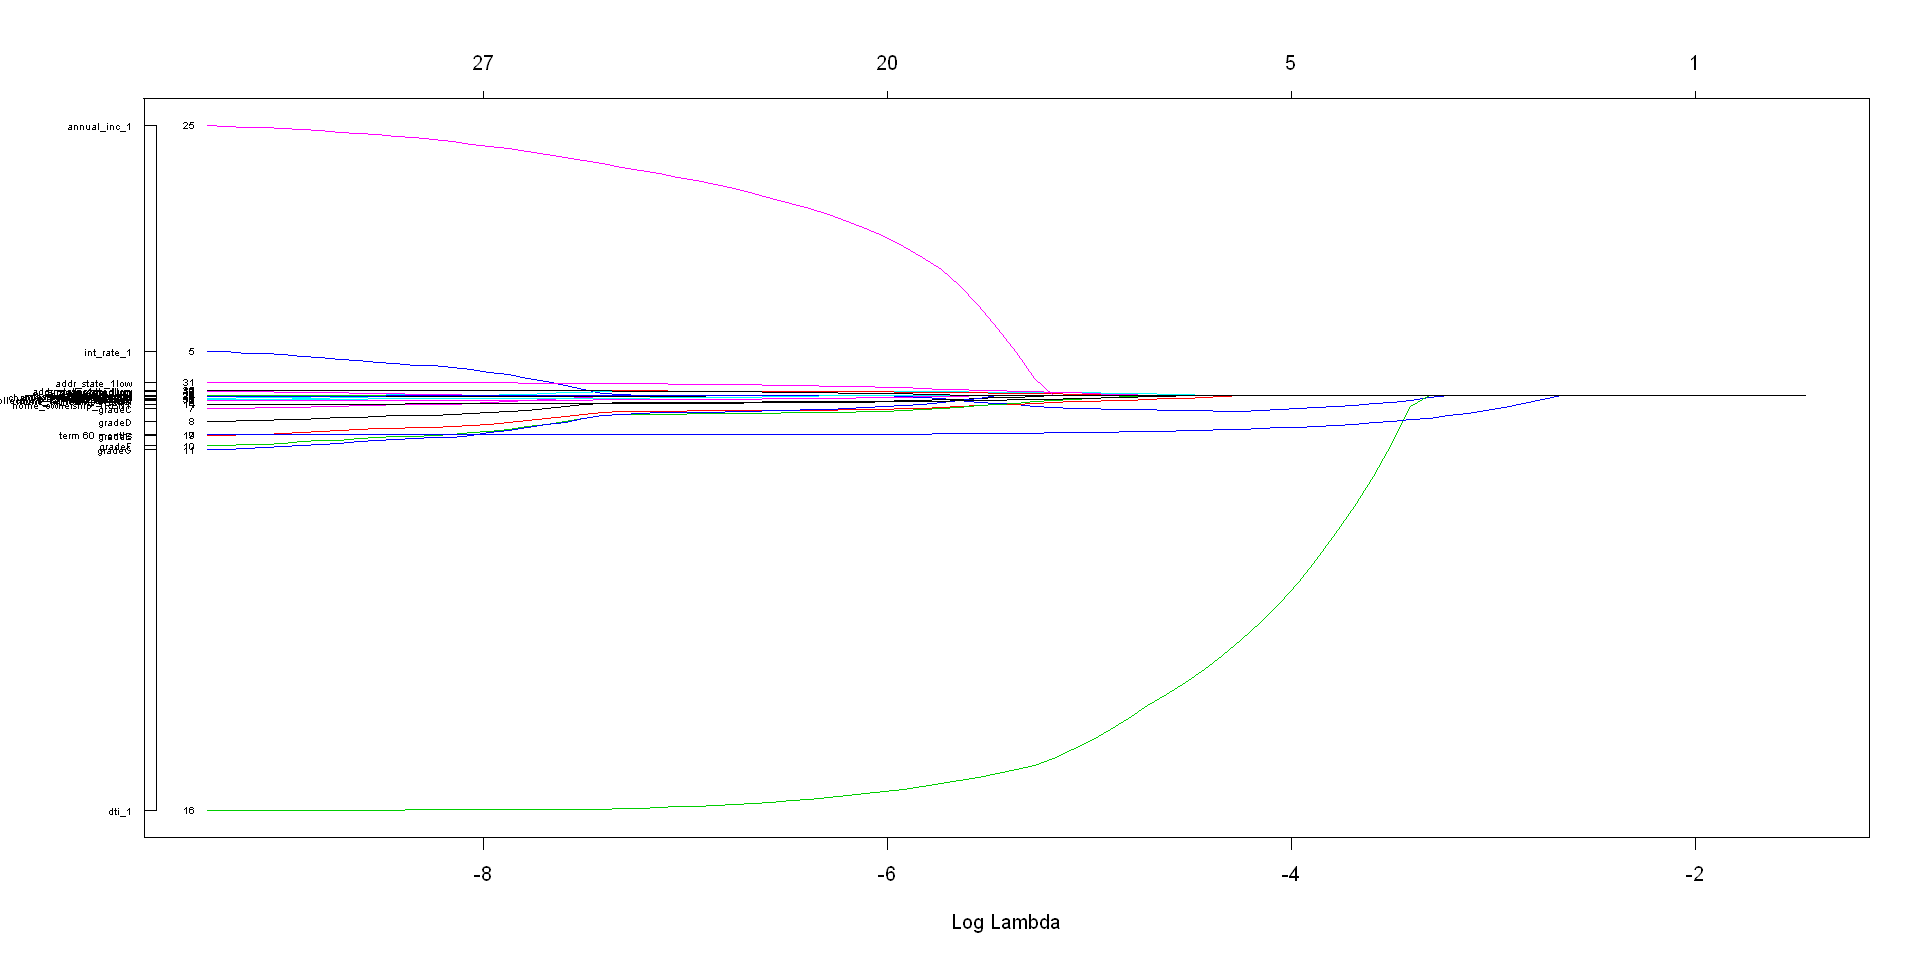

In [150]:
options(repr.plot.width=16, repr.plot.height=8)
# default is par(mar=c(5.1,4.1,4.1,2.1), bottom, lef, top, right
par(mar = c(5.1,6,4.1,2.1))#change the margiof the chart
plot(fit, xvar = 'lambda', label = T, yaxt='n', ylab = "")
axis(2, at=vnat,line=-.5,label = colnames(ind)[-1],las=1, cex.axis=0.5)

In [151]:
coef(fit, s = 1/exp(8))   #calculate the coefficient given lambda = 1/exp(8)

33 x 1 sparse Matrix of class "dgCMatrix"
                                       1
(Intercept)                -1.648888e-01
(Intercept)                 .           
mths_since_recent_inq       7.271006e-04
mo_sin_old_rev_tl_op       -7.764808e-05
inq_last_6mths             -1.791628e-04
int_rate_1                  7.521496e-02
gradeB                      1.781148e-03
gradeC                     -2.175412e-02
gradeD                     -5.350377e-02
gradeE                     -8.920694e-02
gradeF                     -1.114401e-01
gradeG                     -1.172913e-01
home_ownership_1other       .           
home_ownership_1OWN        -1.405418e-02
home_ownership_1RENT       -2.513675e-02
emp_length_1low             1.550379e-02
dti_1                      -1.280005e+00
term 60 months             -1.203980e-01
purpose_1low                6.555845e-04
purpose_1medium             1.185366e-03
last_fico_range_low         1.697343e-03
installment                -8.423385e-05
revol_bal      

### Cross validation

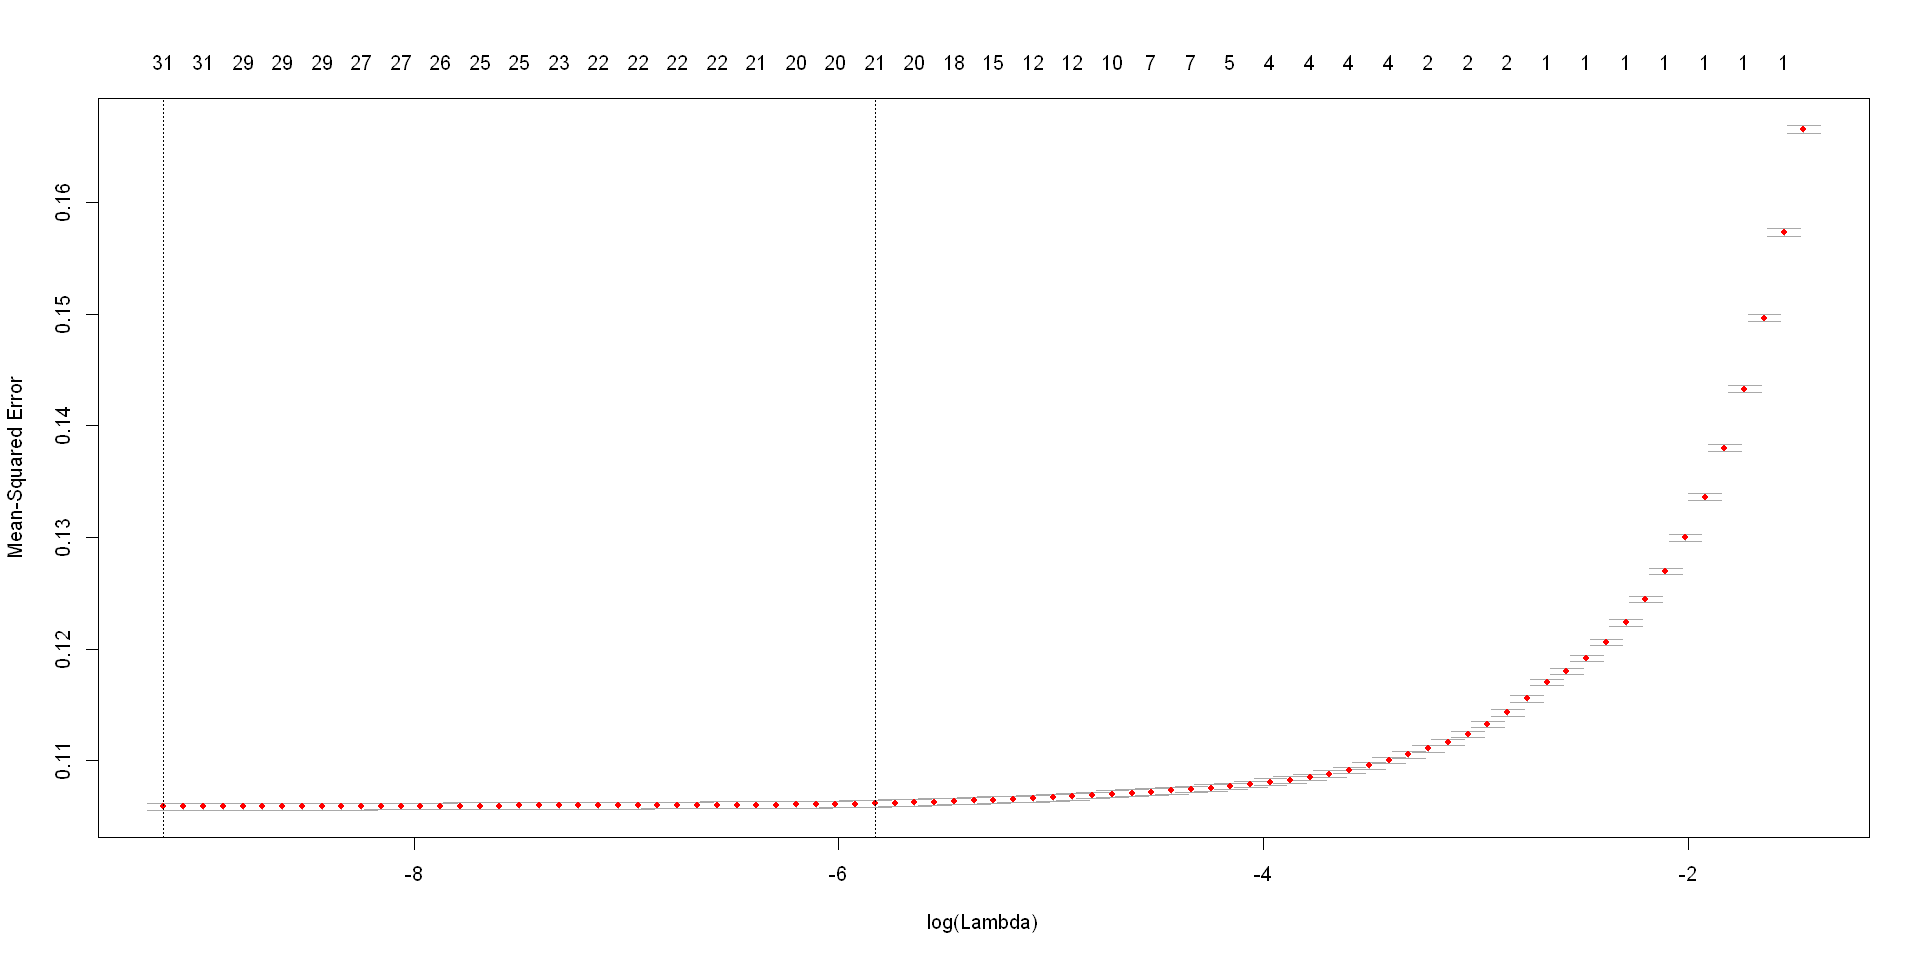

In [152]:
# We can choose lambda by checking the picture, Still kinda subjective
# use cross validation to get optimal value of lambda, 
cvfit <- cv.glmnet(ind, dep)
plot(cvfit)

In [211]:
cvfit2 = cv.glmnet(ind, dep, family = "binomial", type.measure = "auc")

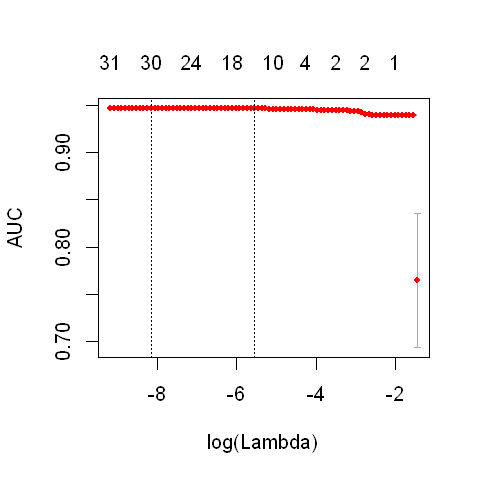

In [213]:
plot(cvfit2)

In [153]:
# Two selected lambdas are shown, 
cvfit$lambda.min # value of lambda gives minimal mean cross validated error

[1] 0.0001033313

In [154]:
cvfit$lambda.1se # most regularized model such that error is within one std err of the minimum

[1] 0.002942913

In [155]:
coef(cvfit, s = "lambda.min")

33 x 1 sparse Matrix of class "dgCMatrix"
                                       1
(Intercept)                -1.739043e-01
(Intercept)                 .           
mths_since_recent_inq       7.214653e-04
mo_sin_old_rev_tl_op       -8.114986e-05
inq_last_6mths             -7.179077e-04
int_rate_1                  1.320852e-01
gradeB                     -6.637697e-03
gradeC                     -3.831936e-02
gradeD                     -7.736264e-02
gradeE                     -1.195844e-01
gradeF                     -1.508299e-01
gradeG                     -1.627157e-01
home_ownership_1other      -1.307755e-02
home_ownership_1OWN        -1.496195e-02
home_ownership_1RENT       -2.576974e-02
emp_length_1low             1.579959e-02
dti_1                      -1.283160e+00
term 60 months             -1.210503e-01
purpose_1low                1.210695e-02
purpose_1medium             1.244178e-02
last_fico_range_low         1.698443e-03
installment                -8.629858e-05
revol_bal      

In [224]:
fit2 <- glmnet(x=ind, y=dep, lambda=0.000103331323865286) # default is alpha = 1, lasso

In [227]:
predict_logit = predict(fit2,newx = test.ind,type="response")

In [358]:
head(predict_logit)

,s0
1,0.9764610
7,0.6842528
9,0.7981512
14,1.0408389
16,0.5791898
17,0.8828081


In [229]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.4.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:glmnet':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var



In [230]:
rocCurve_logit = roc(response = test$fully_paid, predictor = predict_logit)

Warning message in roc.default(response = test$fully_paid, predictor = predict_logit):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."

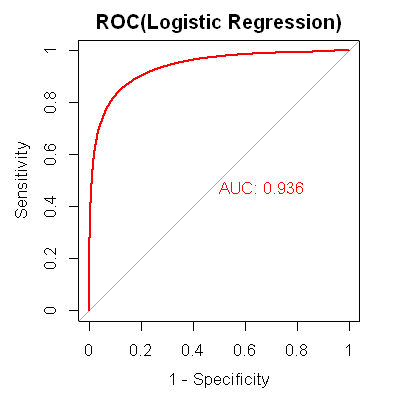

In [388]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res= 100)
auc_curve = auc(rocCurve_logit)
plot(rocCurve_logit,legacy.axes = TRUE,print.auc = TRUE,col="red",main="ROC(Logistic Regression)",)

# decision tree

In [156]:
library(rpart)

In [157]:
tree0 <- rpart(fully_paid ~ ., data = modeldata2, method = "class", control=rpart.control(cp = 0.0001))
# step 1 start with a small cp (complexity parameter, alpha)
# method = 'class' for classification
# method = 'anova' for regression

In [159]:
tree1 <-rpart(fully_paid ~ ., data = modeldata2, method = "class", control=rpart.control(cp = 0.1))# cp = 1, 0.1, 0.01 (default), 0

In [160]:
tree1

n= 552105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 552105 116882 1 (0.21170248 0.78829752)  
  2) last_fico_range_low< 627.5 151025  48807 0 (0.67682834 0.32317166) *
  3) last_fico_range_low>=627.5 401080  14664 1 (0.03656128 0.96343872) *

how to determine the value of complexiy parameter? using printcp

In [161]:
printcp(tree0)
# display the cross validation result
# rel error = sum of squared over all leaf nodes of train data / sum of squared at root node
# xerror = sum of squared over all leaf nodes of left over data / sum of squared at root node


Classification tree:
rpart(formula = fully_paid ~ ., data = modeldata2, method = "class", 
    control = rpart.control(cp = 1e-04))

Variables actually used in tree construction:
 [1] annual_inc           delinq_2yrs          dti                 
 [4] grade                installment          int_rate            
 [7] last_fico_range_low  mo_sin_old_rev_tl_op pct_tl_nvr_dlq      
[10] purpose_1            revol_bal            revol_util          
[13] term                

Root node error: 116882/552105 = 0.2117

n= 552105 

           CP nsplit rel error  xerror      xstd
1  0.45696514      0   1.00000 1.00000 0.0025970
2  0.02888811      1   0.54303 0.54072 0.0020240
3  0.00351209      3   0.48526 0.48944 0.0019374
4  0.00065023      5   0.47823 0.47991 0.0019206
5  0.00057964      7   0.47693 0.47771 0.0019167
6  0.00051334     11   0.47462 0.47663 0.0019148
7  0.00041495     12   0.47410 0.47482 0.0019116
8  0.00038928     18   0.47079 0.47343 0.0019091
9  0.00036361     21   0.46

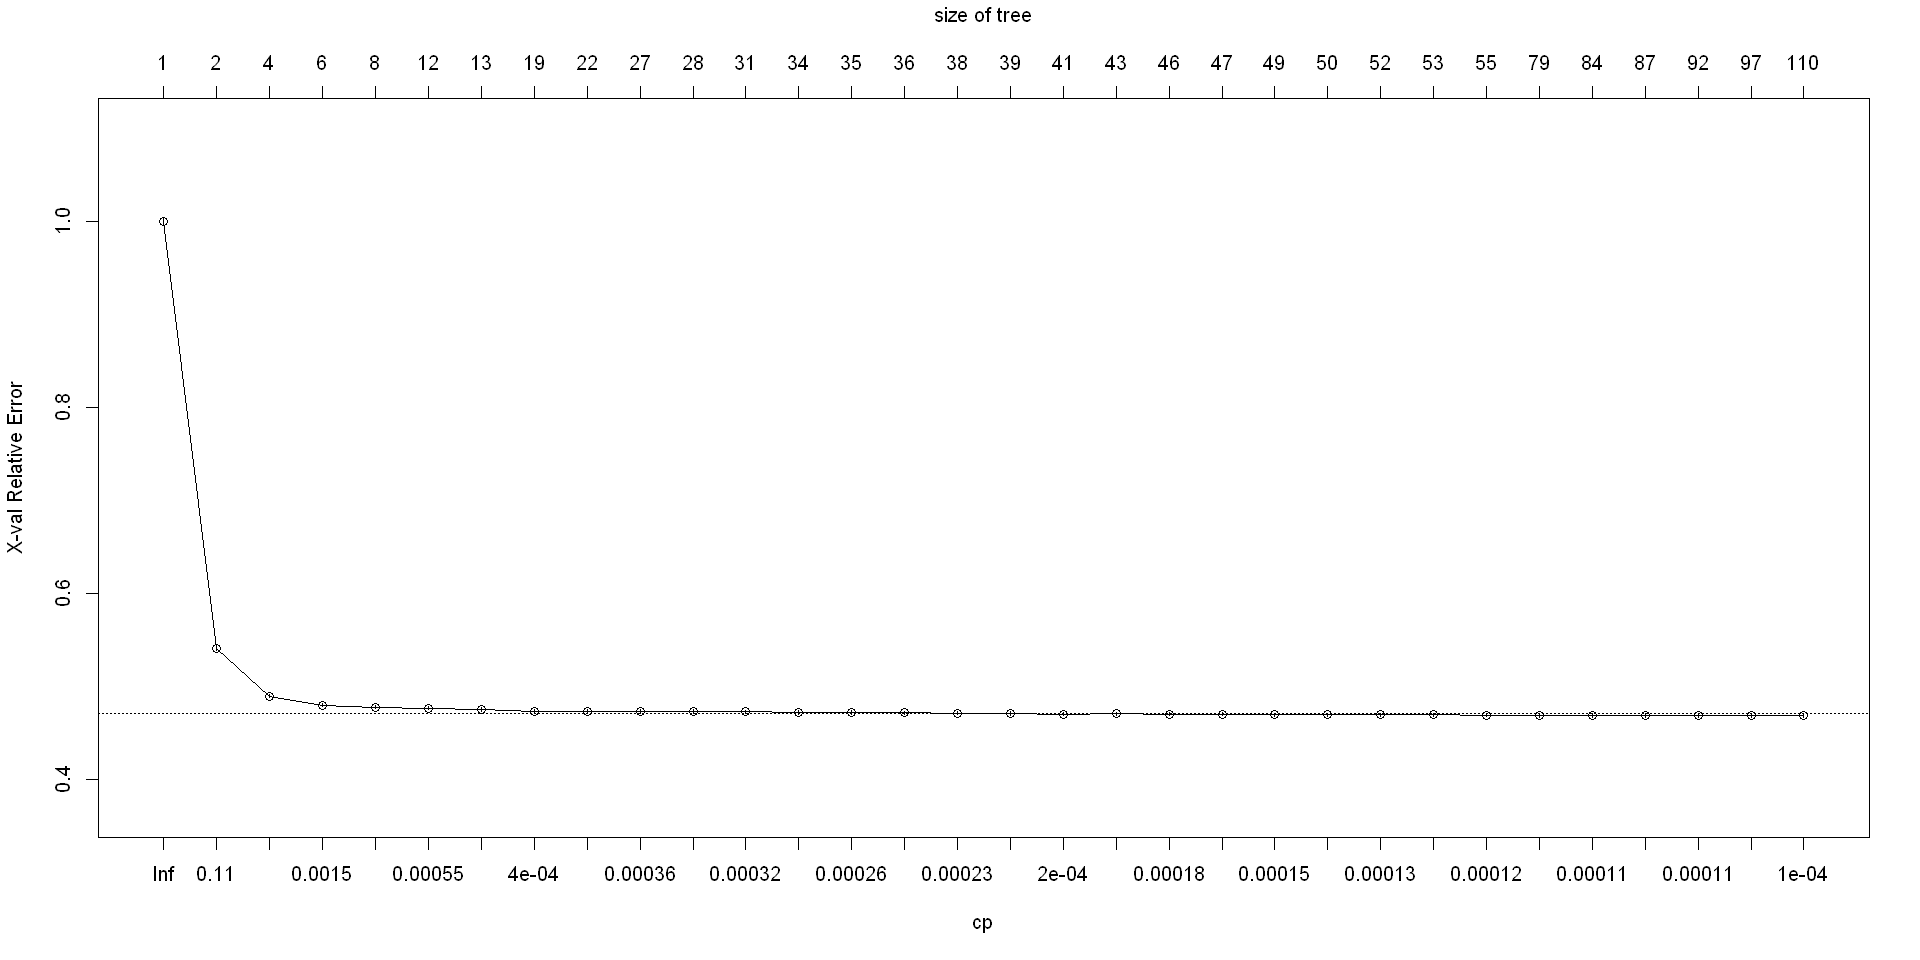

In [163]:
plotcp(tree0) 
# plot xerror

In [164]:
#Pick the tree size that minimizes xerror.
# Hence we want the cp value that minimizes the xerror.
bestcp <- tree0$cptable[which.min(tree0$cptable[,"xerror"]), "CP"]

In [165]:
bestcp

[1] 0.0001026676

In [166]:
cp.tab <- as.data.frame(tree0$cptable)
with(cp.tab, min(which(xerror - 2*xstd < min(xerror))))

[1] 13

In [167]:
bestcp <- cp.tab$CP[with(cp.tab, min(which(xerror - xstd < min(xerror))))]

In [168]:
# Step 3: Prune the tree using the best cp.
tree.pruned <- prune(tree0, cp = bestcp)
tree.pruned

n= 552105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 552105 116882 1 (0.21170248 0.78829752)  
      2) last_fico_range_low< 627.5 151025  48807 0 (0.67682834 0.32317166)  
        4) term= 60 months 50087   7261 0 (0.85503224 0.14496776) *
        5) term= 36 months 100938  41546 0 (0.58840080 0.41159920)  
         10) last_fico_range_low< 582.5 65583  20492 0 (0.68754098 0.31245902)  
           20) last_fico_range_low< 522.5 22609   4569 0 (0.79791234 0.20208766) *
           21) last_fico_range_low>=522.5 42974  15923 0 (0.62947364 0.37052636)  
             42) installment>=448.415 13997   4188 0 (0.70079303 0.29920697) *
             43) installment< 448.415 28977  11735 0 (0.59502364 0.40497636)  
               86) last_fico_range_low< 557.5 16628   6039 0 (0.63681742 0.36318258) *
               87) last_fico_range_low>=557.5 12349   5696 0 (0.53874808 0.46125192)  
                174) dti>=18.215 6701   2775 0 (0.58588270 0.41411730)  

In [171]:
library("rpart.plot")
library(rattle)

Warning message:
"package 'rattle' was built under R version 3.4.3"Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.2

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

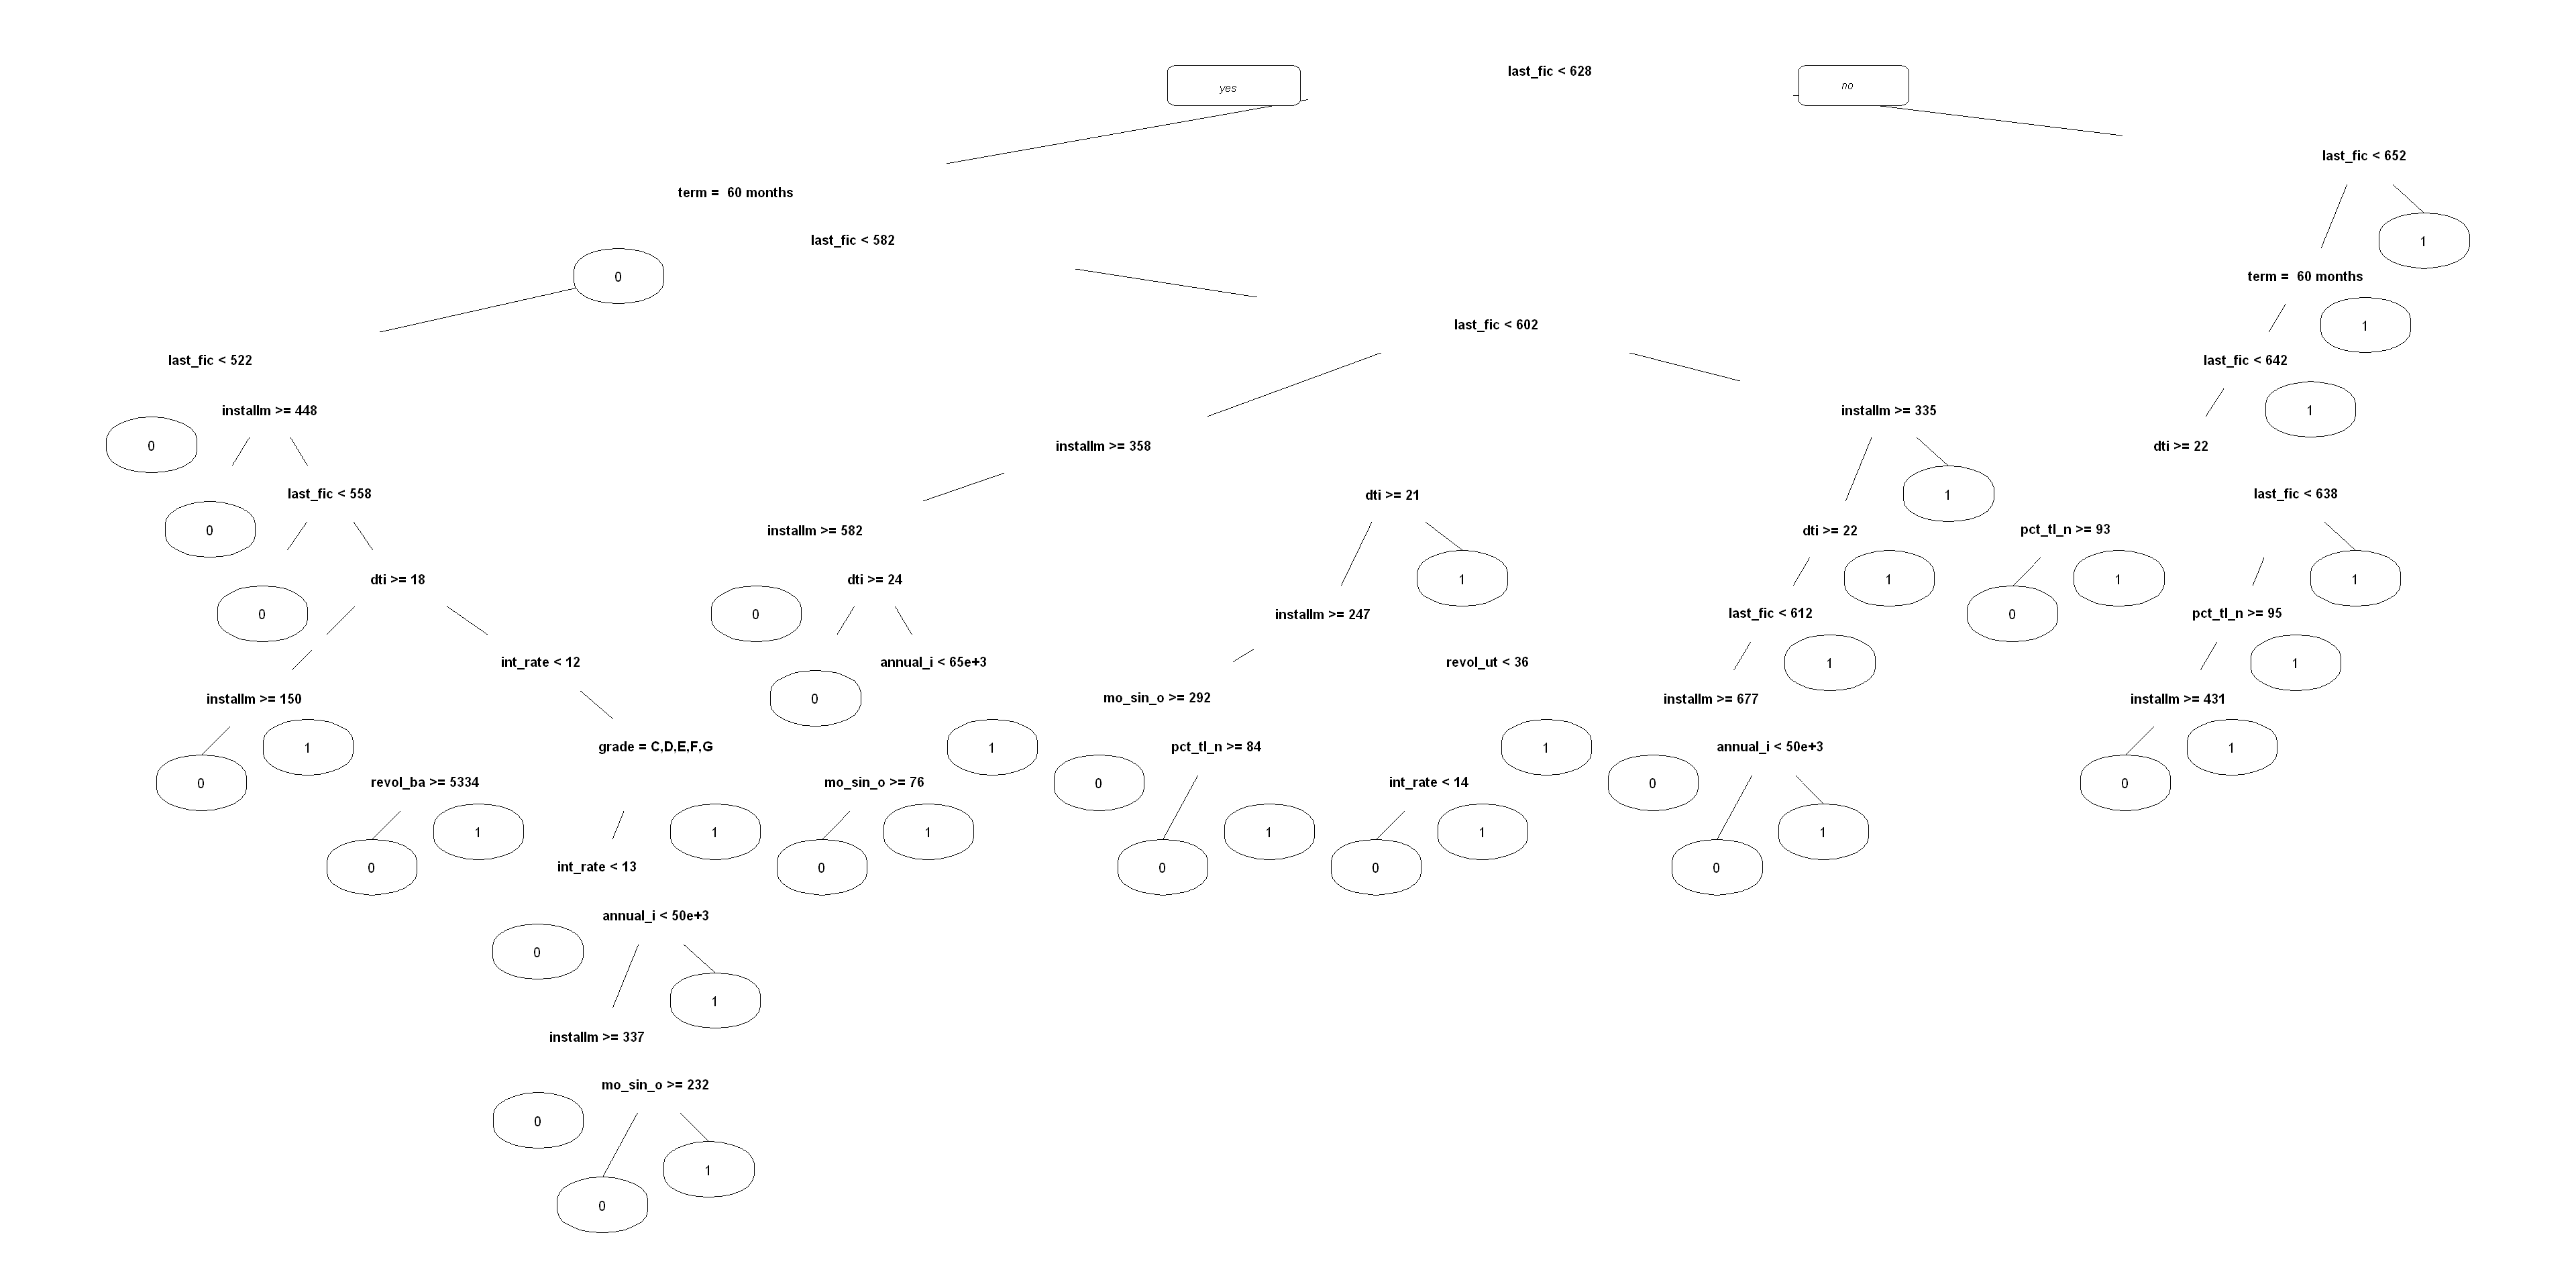

In [172]:
options(repr.plot.width=32, repr.plot.height=16)
prp(tree.pruned, faclen = 0, cex = 1)
# http://www.milbo.org/rpart-plot/prp.pdf
# cex is the text size, faclen is the length of factor level names in splits.

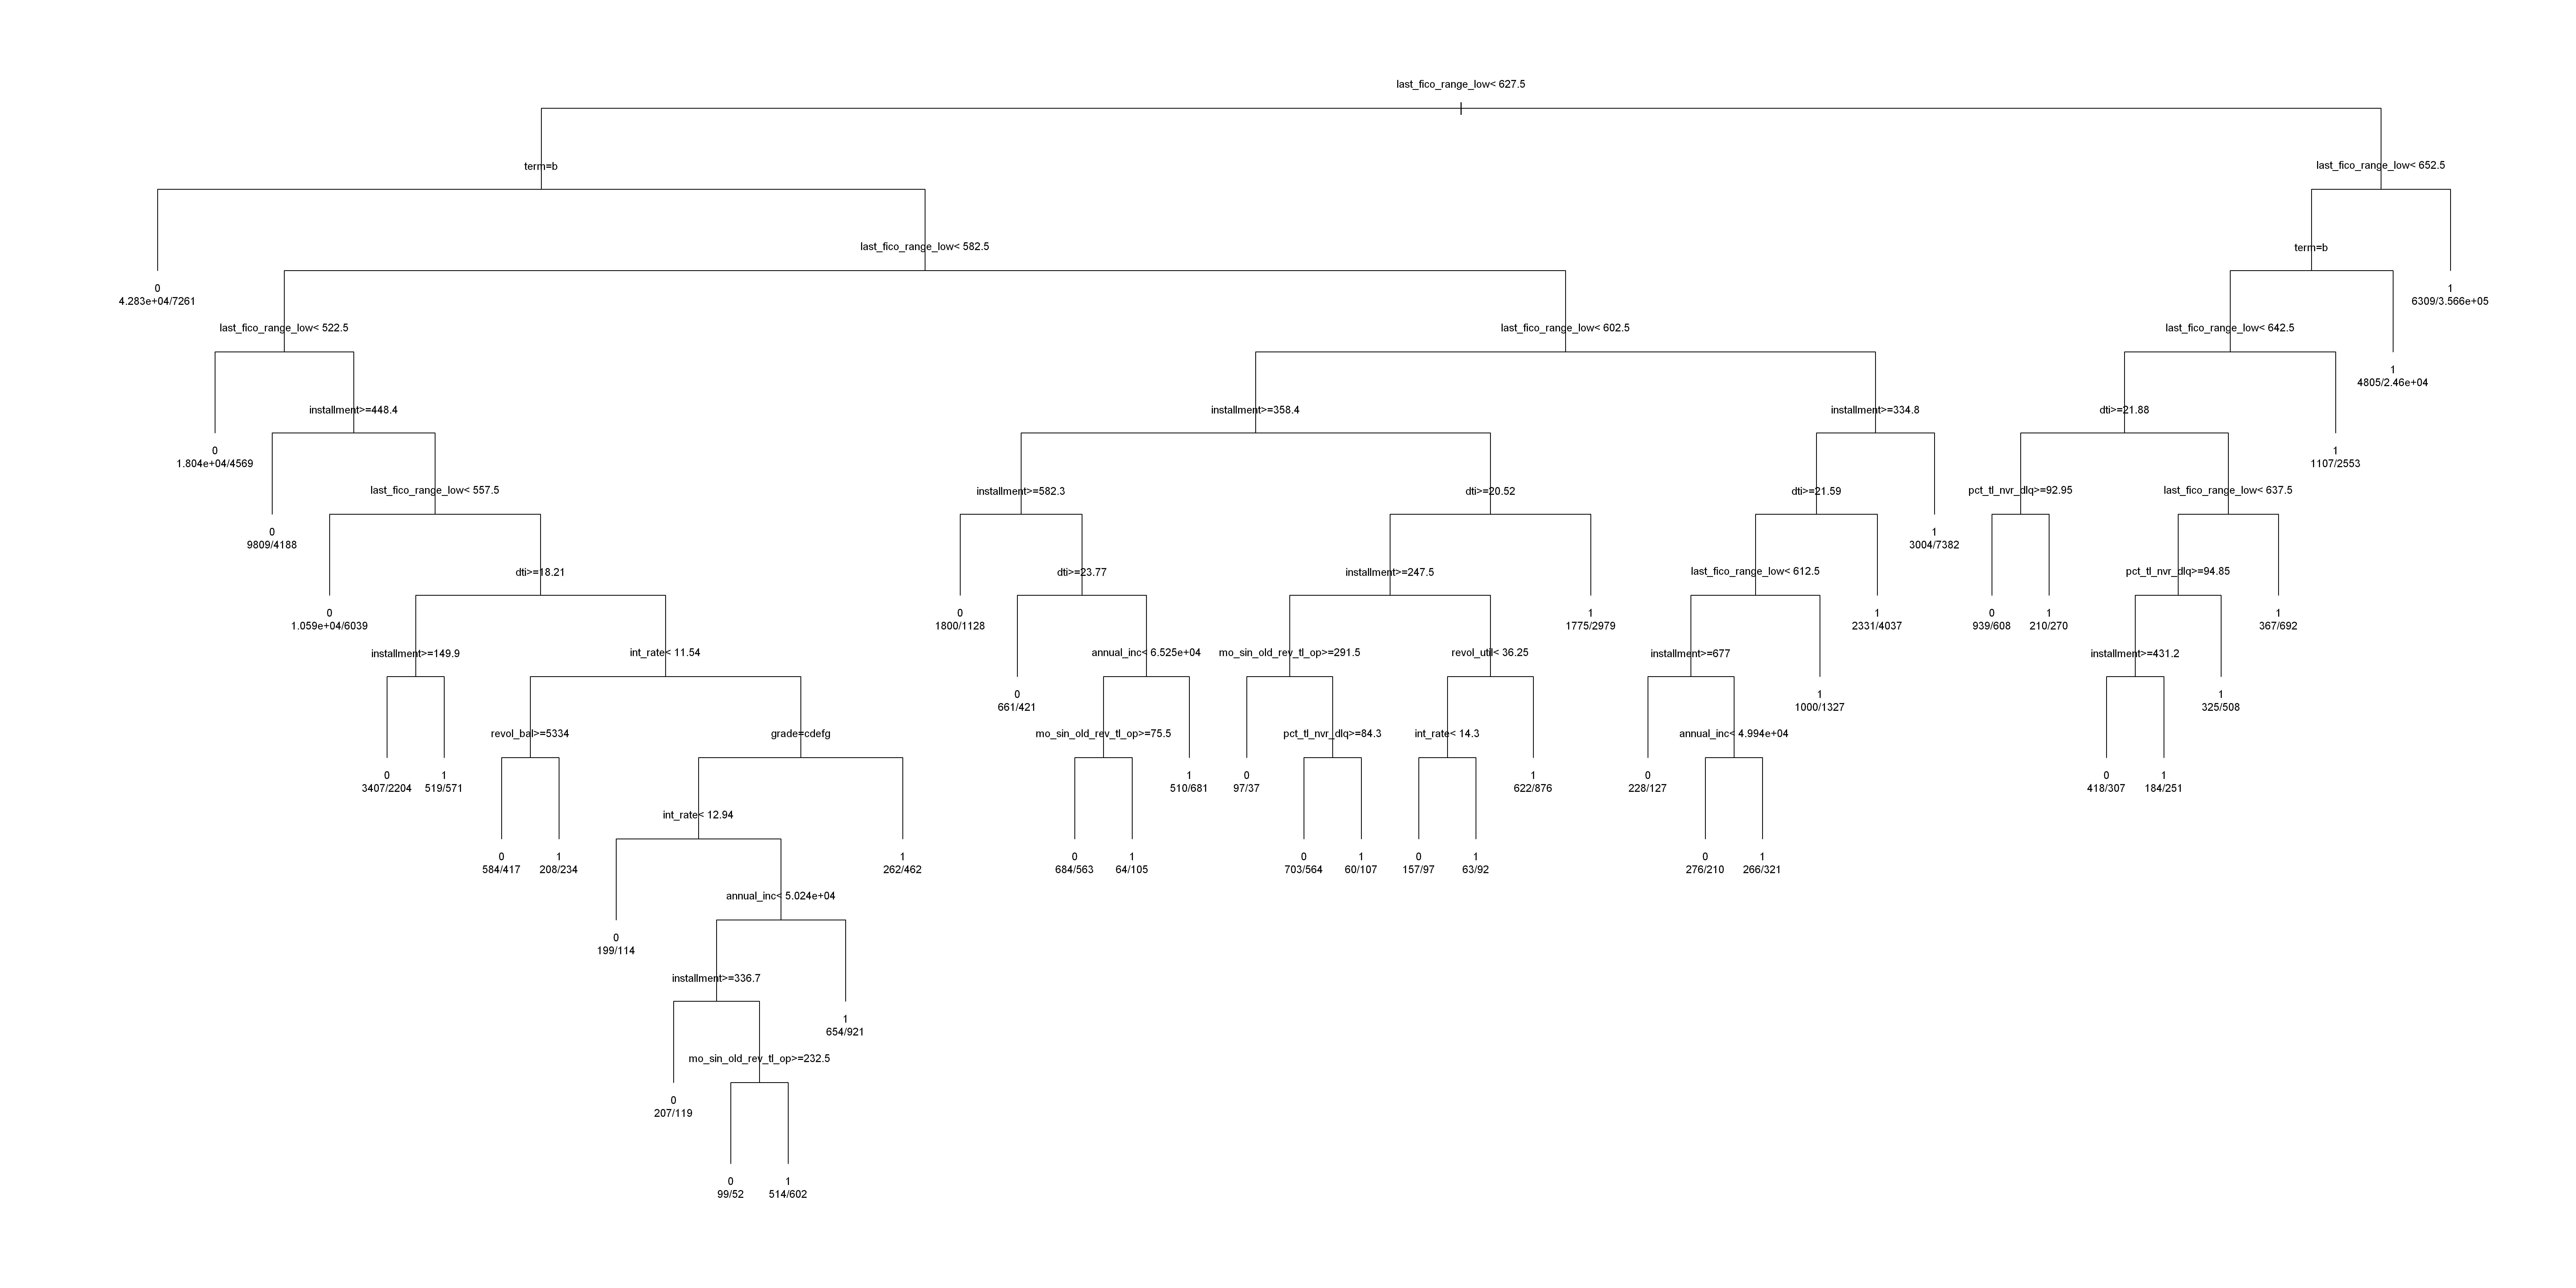

In [178]:
options(repr.plot.width=32, repr.plot.height=16,repr.plot.res= 300)
plot(tree.pruned, uniform = TRUE) 
# Since labels often extend outside the plot region it can be helpful to specify xpd = TRUE
text(tree.pruned, cex = 0.8, use.n = TRUE, xpd = TRUE)

In [185]:
library(dplyr)
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.4.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [482]:
predict_loan_status_tree = predict(tree.pruned, newdata = test, type = "prob")[,2] 

In [483]:
rocCurve_tree = roc(response = test$fully_paid, predictor = predict_loan_status_tree)

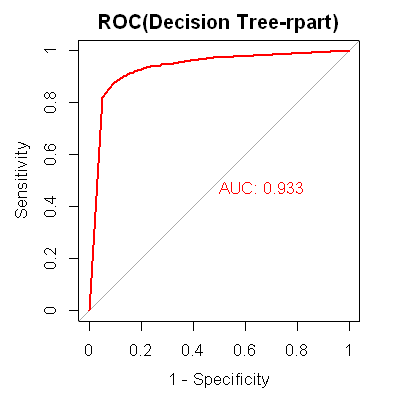

In [484]:
plot(rocCurve_tree,legacy.axes = TRUE,print.auc = TRUE,col="red",main="ROC(Decision Tree-rpart)")

In [357]:
head(pred.pruned)

1         7         9        14        16        17 
0.9826167 0.5238532 0.6266302 0.9826167 0.1449678 0.9826167

In [205]:
perf2

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.9330435


Slot "alpha.values":
list()


# Random Forest

In [238]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.4.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [253]:
modeldata2 = modeldata[,c('fully_paid','mths_since_recent_inq' ,'mo_sin_old_rev_tl_op','inq_last_6mths','int_rate','grade', 'home_ownership_1','emp_length_1', 'dti','term', 'purpose_1','last_fico_range_low','installment','revol_bal','revol_util','pct_tl_nvr_dlq','annual_inc','delinq_2yrs','delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','addr_state_1')]
modeldata2$fully_paid = as.factor(modeldata3$fully_paid)
char = getCharColumns(modeldata2)
#transform character to factor
modeldata3[char] <- lapply(modeldata3[char] , factor)

In [284]:
modeldata3$fully_paid = as.factor(modeldata3$fully_paid)

In [239]:
getCharColumns<-function(t){
    tn = sapply(t,function(x){is.character(x)})
    return(names(tn)[which(tn)])
}

In [254]:
char = getCharColumns(modeldata3)

In [408]:
#pay attention to the seed
set.seed(1)
train3.ind <- sample(1:dim(modeldata3)[1], 0.7 * dim(modeldata3)[1])
train3 <- modeldata3[train.ind, ]
test3 <- modeldata3[-train.ind, ]

In [259]:
library(caret)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [411]:
set.seed(300)
#down sampling again so than we get more info when stacking
samp = downSample(train3[-getIndexsOfColumns(train3, c( "fully_paid") )],train3$fully_paid,yname="fully_paid")
table(samp$fully_paid)


    0     1 
81598 81598 

In [412]:
table(train3$fully_paid)


     0      1 
 81598 304875 

In [413]:
#choose small amount data for tuning 
train_index_tuning = createDataPartition(samp$fully_paid,p = 0.05,list=FALSE,times=1)
#choose small amount data for re-train
train_index_training = createDataPartition(samp$fully_paid,p = 0.1,list=FALSE,times=1)

In [414]:
control <- trainControl(method="repeatedcv", number=10, repeats=3)

In [312]:
rfGrid = expand.grid(
                .mtry = as.integer(seq(2,ncol(samp), (ncol(samp) - 2)/4))
                )

In [319]:
rfTuned = train(
    samp[train_index_tuning,-getIndexsOfColumns(samp,"fully_paid")],
    y = samp[train_index_tuning,"fully_paid"],
    method = "rf",
    tuneGrid = rfGrid,
    trControl = control
    )

Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: re

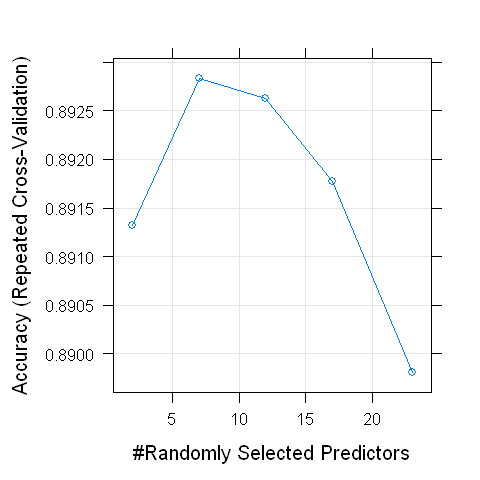

In [320]:
plot(rfTuned)

In [321]:
rfTuned

Random Forest 

8180 samples
  22 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7362, 7362, 7362, 7362, 7362, 7362, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8913203  0.7826406
   7    0.8928280  0.7856561
  12    0.8926243  0.7852486
  17    0.8917685  0.7835371
  23    0.8898126  0.7796251

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 7.

In [415]:
rfGrid = expand.grid(.mtry=c(1:15))

In [416]:
rfTuned = train(
    samp[train_index_tuning,-getIndexsOfColumns(samp,"fully_paid")],
    y = samp[train_index_tuning,"fully_paid"],
    method = "rf",
    tuneGrid = rfGrid,
    trControl = control
    )

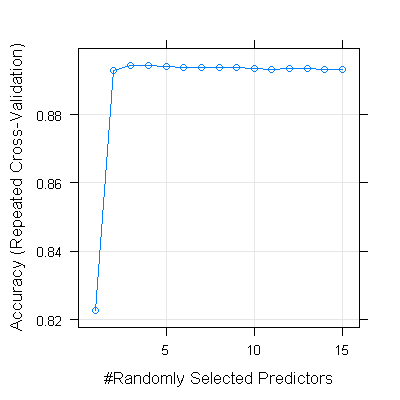

In [417]:
plot(rfTuned)

In [418]:
rfTuned

Random Forest 

8160 samples
  22 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7344, 7344, 7344, 7344, 7344, 7344, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.8227941  0.6455882
   2    0.8928922  0.7857843
   3    0.8942810  0.7885621
   4    0.8942402  0.7884804
   5    0.8941993  0.7883987
   6    0.8937500  0.7875000
   7    0.8937908  0.7875817
   8    0.8936683  0.7873366
   9    0.8938725  0.7877451
  10    0.8933415  0.7866830
  11    0.8931373  0.7862745
  12    0.8933415  0.7866830
  13    0.8935049  0.7870098
  14    0.8930556  0.7861111
  15    0.8930556  0.7861111

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 3.

In [419]:
rf_model = randomForest(fully_paid ~ . ,data = samp[train_index_training,],mtry = 3,ntree=400)

In [420]:
predict_loan_status_rf = predict(rf_model,test3,"prob")

In [421]:
predict_loan_status_rf_1 = as.data.frame(predict_loan_status_rf)

In [422]:
colnames(predict_loan_status_rf_1) = c("default", "fully.paid")

In [423]:
predict_loan_status_rf_2 = as.data.frame(predict_loan_status_rf_1)$fully.paid

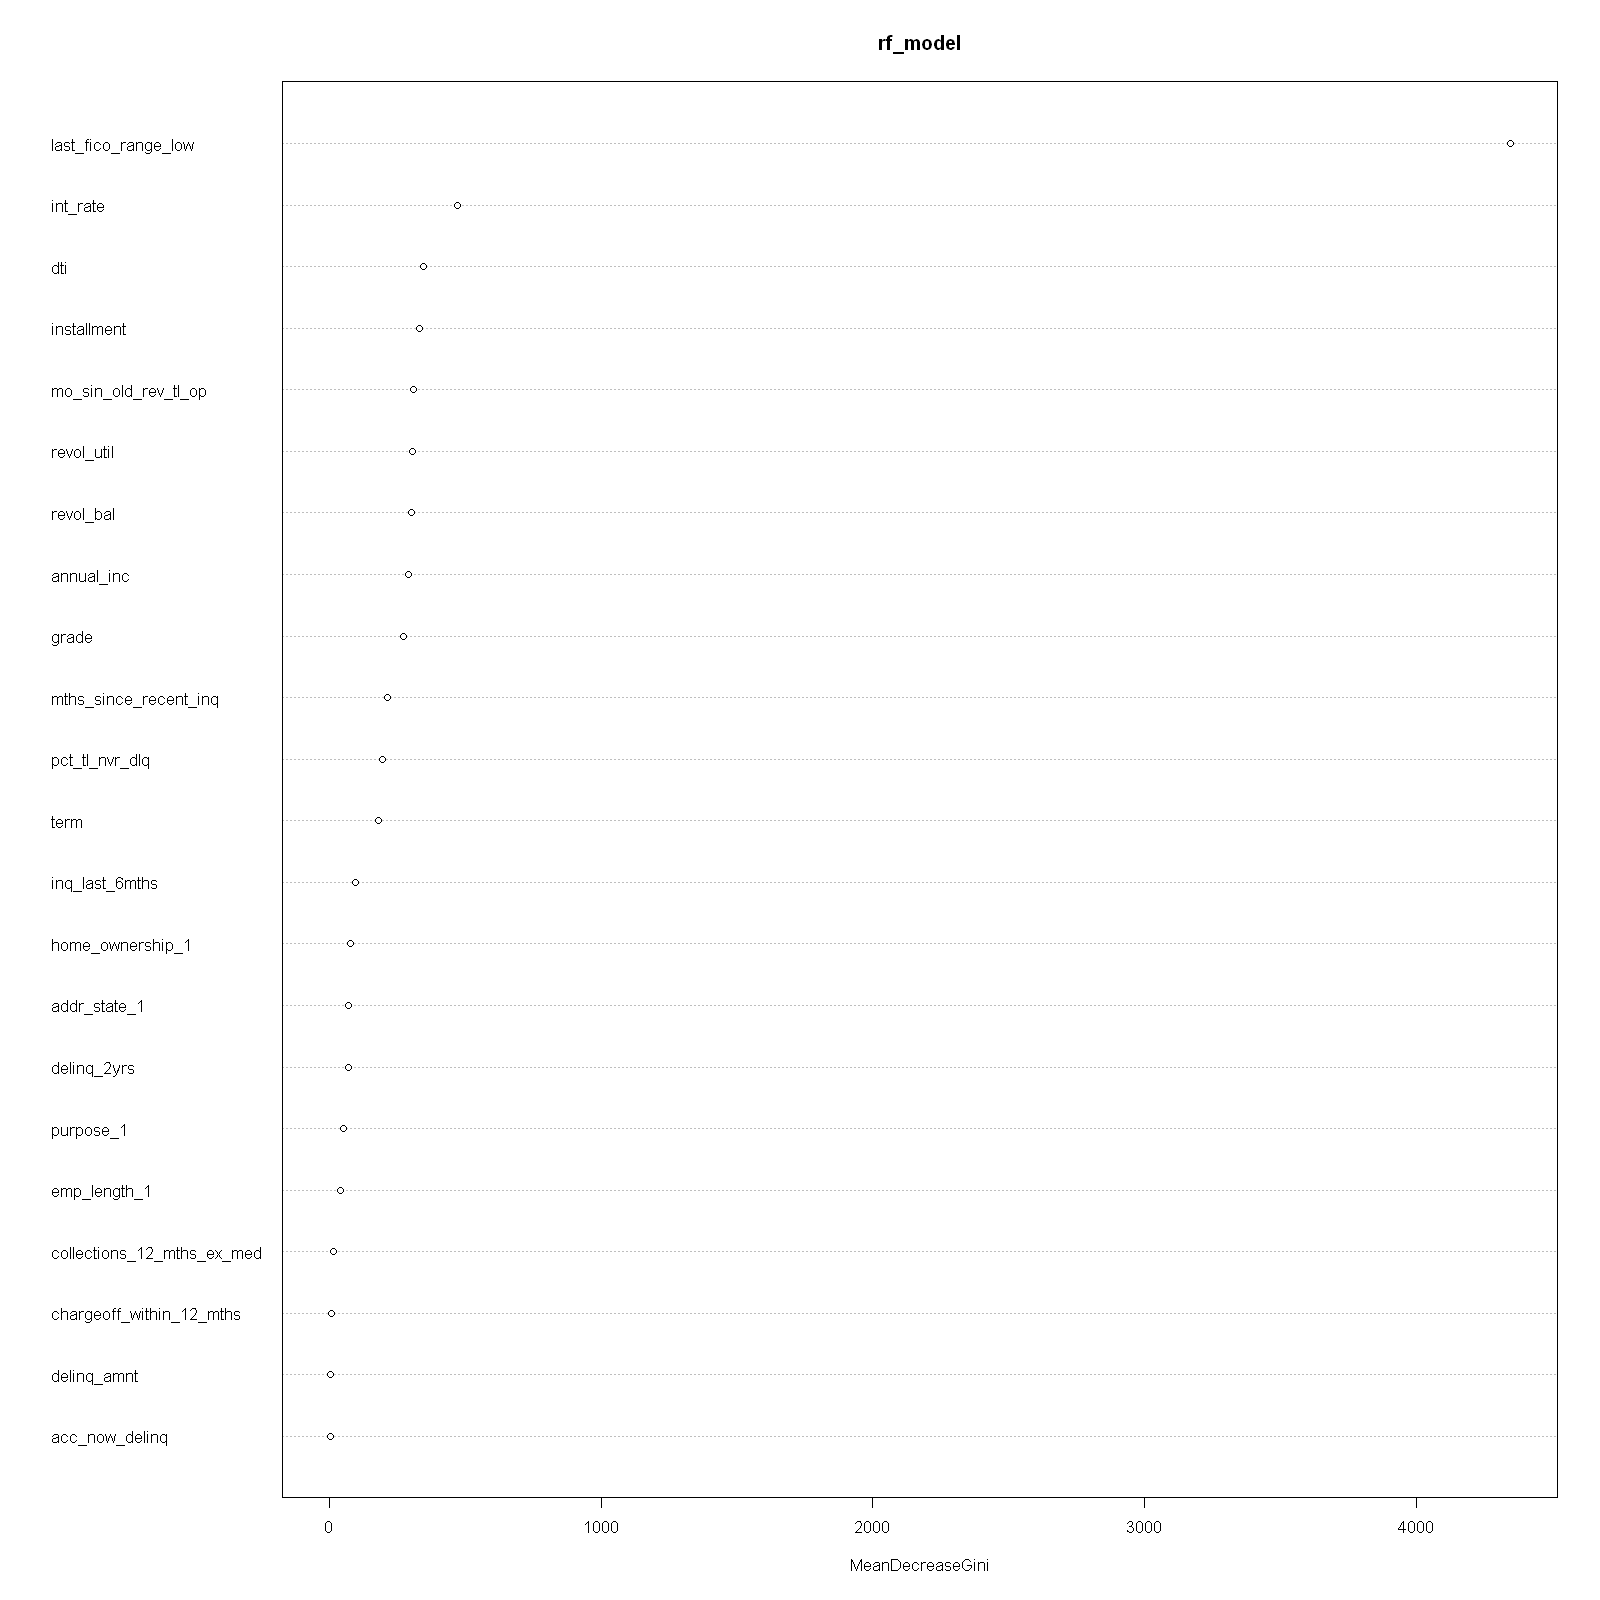

In [459]:
varImpPlot(rf_model)

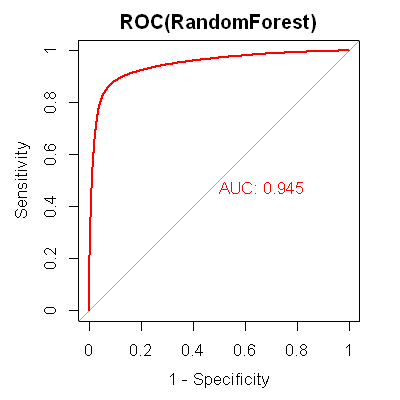

In [424]:
rocCurve_rf = roc(response = test3$fully_paid,
               predictor = predict_loan_status_rf_2)
auc_curve = auc(rocCurve_rf)

plot(rocCurve_rf,legacy.axes = TRUE,print.auc = TRUE,col="red",main="ROC(RandomForest)")

# xgboost

In [445]:
# http://xgboost.readthedocs.io/en/latest/
library(xgboost) 

In [446]:
train.label <- train$fully_paid

In [452]:
# Xgboost manages only numeric vectors.
feature.matrix <- model.matrix( ~ ., data = train[,-1]) 
# Remember we removed rows with NA in randomForest fitting. model.matrix will also remove rows with any NA.


In [453]:
head(train)

,fully_paid,mths_since_recent_inq,mo_sin_old_rev_tl_op,inq_last_6mths,int_rate,grade,home_ownership_1,emp_length_1,dti,term,...,revol_bal,revol_util,pct_tl_nvr_dlq,annual_inc,delinq_2yrs,delinq_amnt,acc_now_delinq,chargeoff_within_12_mths,collections_12_mths_ex_med,addr_state_1
146589,1,9,291,0,13.66,C,MORTGAGE,low,20.81,36 months,...,31006,53.3,100.0,53000,0,0,0,0,0,medium
205452,0,0,145,1,10.99,B,MORTGAGE,low,26.42,36 months,...,13239,28.5,100.0,54000,0,0,0,0,0,medium
316275,1,19,151,0,10.99,B,RENT,low,15.58,36 months,...,20636,68.6,97.0,85000,1,0,0,0,0,medium
501424,1,8,111,0,13.33,C,MORTGAGE,high,8.22,36 months,...,3362,17.2,95.7,54000,1,0,0,0,0,medium
111349,1,3,225,1,21.49,E,RENT,low,17.06,60 months,...,21825,50.6,90.0,75000,0,0,0,0,0,medium
496001,0,3,238,4,14.65,C,RENT,high,14.87,36 months,...,18055,75.0,73.0,116000,0,0,0,0,0,medium


In [454]:
set.seed(100)
gbt <- xgboost(data =  feature.matrix, 
               label = train.label, 
               max_depth = 8, # for each tree, how deep it goes
               nround = 20, # number of trees
               objective = "reg:linear",
               nthread = 3,
               verbose = 1)

[1]	train-rmse:0.397145 
[2]	train-rmse:0.334875 
[3]	train-rmse:0.299131 
[4]	train-rmse:0.279269 
[5]	train-rmse:0.268389 
[6]	train-rmse:0.262403 
[7]	train-rmse:0.258578 
[8]	train-rmse:0.256486 
[9]	train-rmse:0.255036 
[10]	train-rmse:0.253978 
[11]	train-rmse:0.253199 
[12]	train-rmse:0.252575 
[13]	train-rmse:0.252195 
[14]	train-rmse:0.251571 
[15]	train-rmse:0.251277 
[16]	train-rmse:0.250800 
[17]	train-rmse:0.250429 
[18]	train-rmse:0.250017 
[19]	train-rmse:0.249643 
[20]	train-rmse:0.249409 


In [455]:
importance <- xgb.importance(feature_names = colnames(feature.matrix), model = gbt)
importance
# Gain: contribution of each feature to the model. improvement in accuracy brought by a feature to the branches it is on.
#       For boosted tree model, gain of each feature in each branch of each tree is taken into account, 
#       then average per feature to give a vision of the entire model.
#       Highest percentage means important feature to predict the label used for the training.
# Cover: the number of observation through a branch using this feature as split feature 
# Frequency: counts the number of times a feature is used in all generated trees (often we don't use it).


Feature,Gain,Cover,Frequency
last_fico_range_low,8.648533e-01,3.161210e-01,0.0987312572
term 60 months,4.869690e-02,4.442802e-02,0.0189158016
installment,1.727687e-02,8.171221e-02,0.1282583622
int_rate,1.291851e-02,7.338064e-02,0.1017301038
dti,1.214217e-02,6.740298e-02,0.0996539792
mo_sin_old_rev_tl_op,7.796346e-03,7.935786e-02,0.1091118800
revol_util,7.361654e-03,4.733886e-02,0.0892733564
annual_inc,7.311608e-03,9.073254e-02,0.0865051903
revol_bal,5.413138e-03,3.995157e-02,0.0754325260
pct_tl_nvr_dlq,5.306215e-03,2.271252e-02,0.0468281430


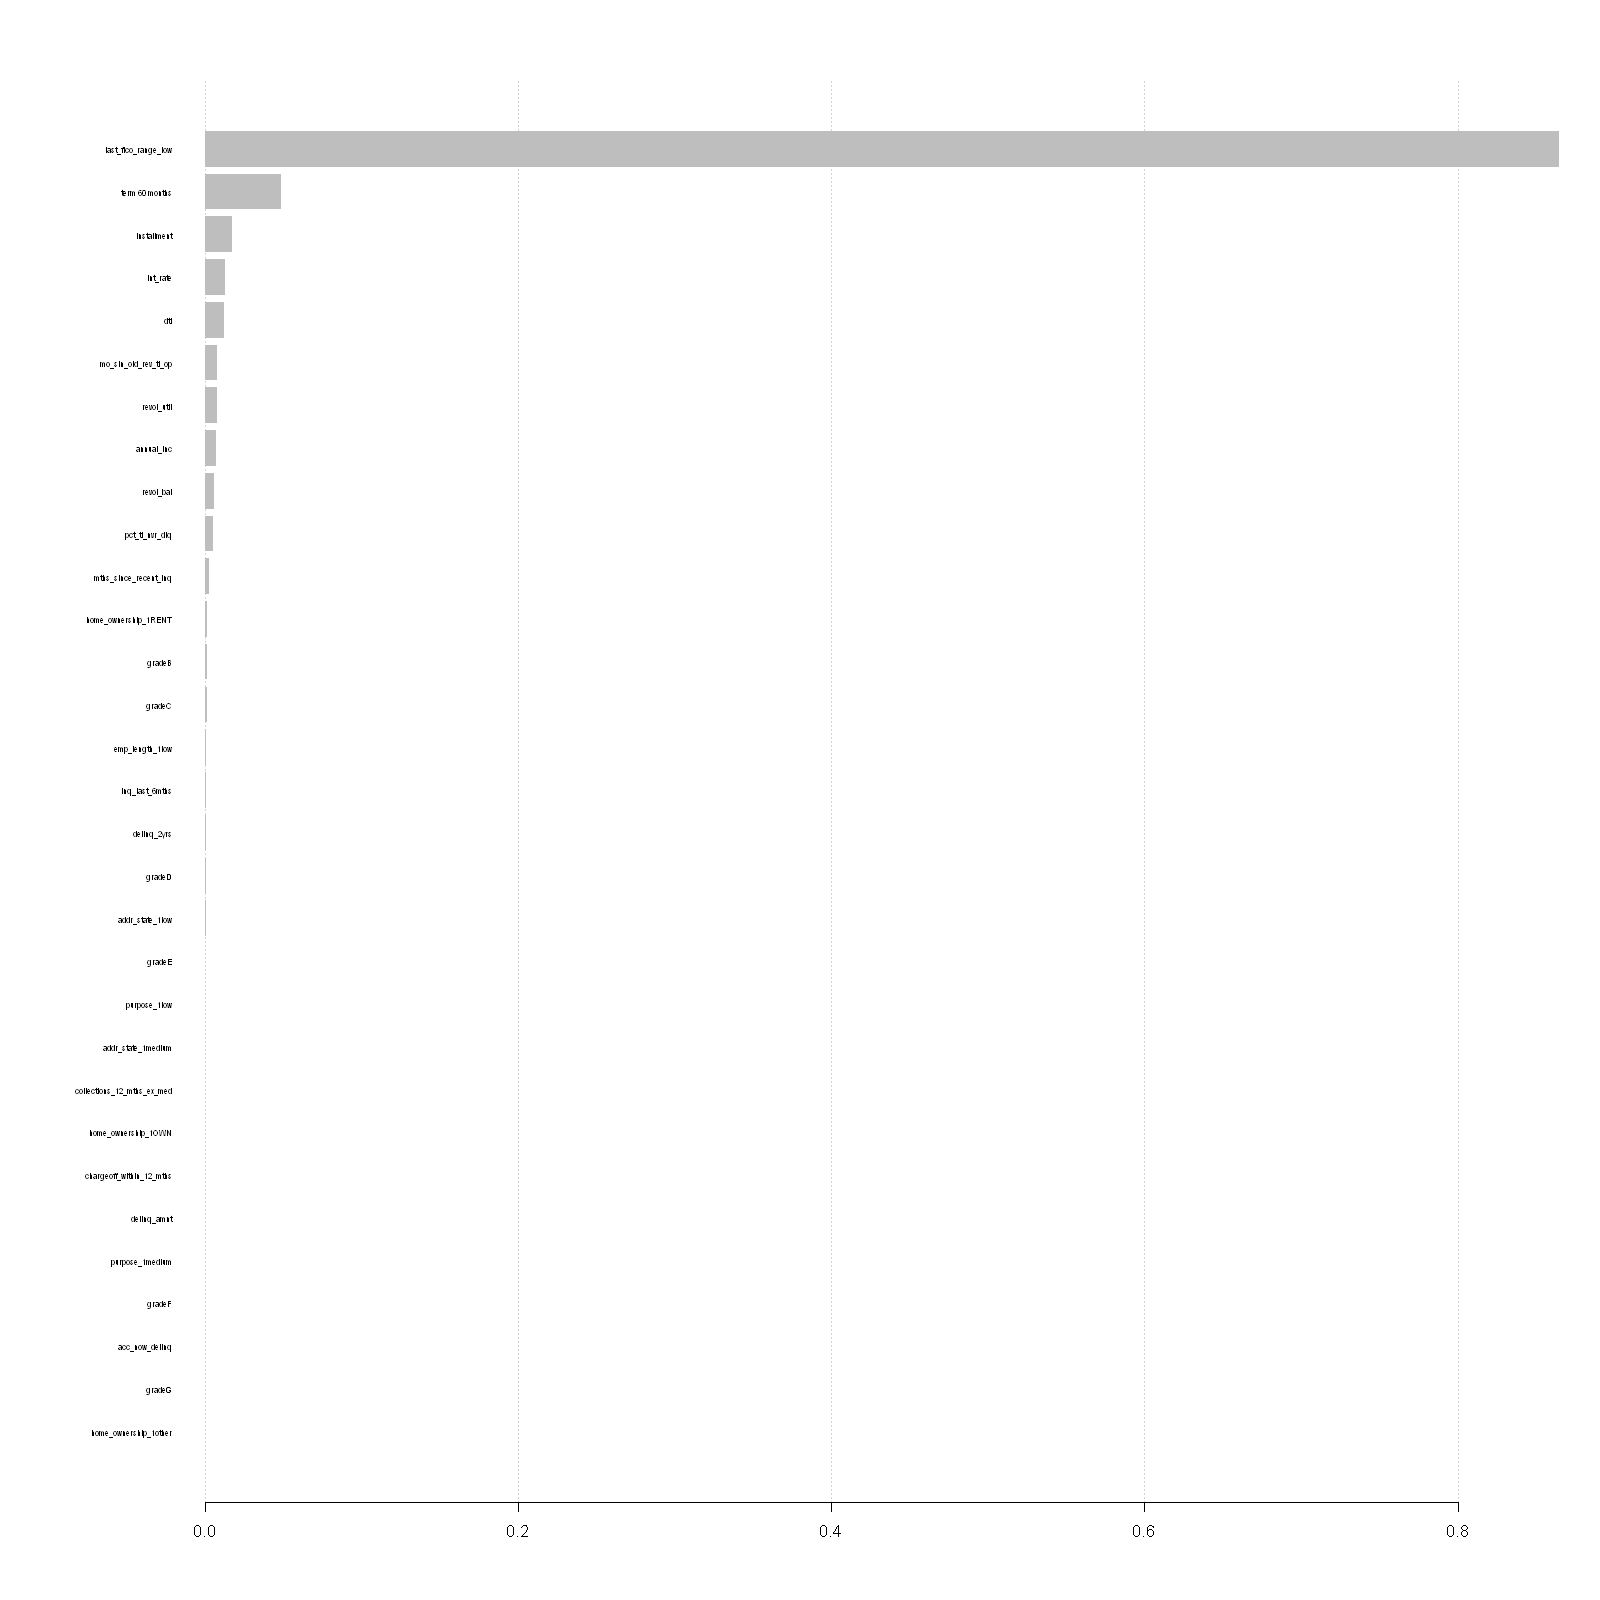

In [458]:
options(repr.plot.width=16, repr.plot.height=16)
xgb.plot.importance(importance)

In [466]:
test.feature.matrix  <- model.matrix( ~., test[, -1])
predict_loan_status_xgb = predict(gbt, test.feature.matrix)

In [469]:
auc_curve = auc(rocCurve_xgb)

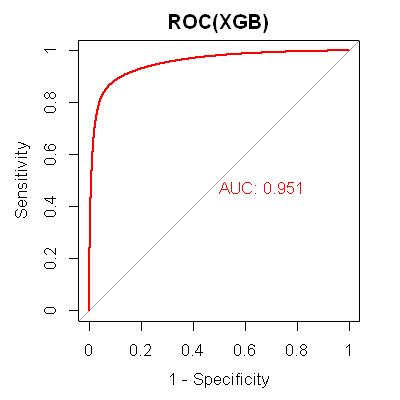

In [468]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res= 100)
plot(rocCurve_xgb,legacy.axes = TRUE,print.auc = TRUE,col="red",main="ROC(XGB)")

# Xgboost Cross Validation

In [460]:
# what's the optimal parameter, for example, number of trees?
par <- list( max_depth = 8,
             objective = "reg:linear",
             nthread = 3,
             verbose = 2)

In [461]:
gbt.cv <- xgb.cv(params = par,
                 data = feature.matrix, label = train.label,
                 nfold = 5, nrounds = 30)
# gbt.cv is to choose best nrounds based on certain parameters set. 
# Because, too small nrounds is underfitting, and too large nrounds is overfitting
# But what about the other parameters? 
# See: http://stackoverflow.com/questions/35050846/xgboost-in-r-how-does-xgb-cv-pass-the-optimal-parameters-into-xgb-train

[1]	train-rmse:0.397024+0.000087	test-rmse:0.397849+0.000188 
[2]	train-rmse:0.334584+0.000149	test-rmse:0.336464+0.000364 
[3]	train-rmse:0.298610+0.000185	test-rmse:0.301607+0.000533 
[4]	train-rmse:0.278543+0.000313	test-rmse:0.282664+0.000585 
[5]	train-rmse:0.267613+0.000307	test-rmse:0.272701+0.000641 
[6]	train-rmse:0.261608+0.000291	test-rmse:0.267562+0.000787 
[7]	train-rmse:0.258005+0.000292	test-rmse:0.264874+0.000873 
[8]	train-rmse:0.255725+0.000376	test-rmse:0.263466+0.000882 
[9]	train-rmse:0.254300+0.000455	test-rmse:0.262774+0.000893 
[10]	train-rmse:0.252837+0.000404	test-rmse:0.262013+0.000879 
[11]	train-rmse:0.251751+0.000304	test-rmse:0.261663+0.000965 
[12]	train-rmse:0.251148+0.000294	test-rmse:0.261517+0.000990 
[13]	train-rmse:0.250439+0.000290	test-rmse:0.261400+0.000965 
[14]	train-rmse:0.249853+0.000259	test-rmse:0.261384+0.000946 
[15]	train-rmse:0.249395+0.000245	test-rmse:0.261363+0.000921 
[16]	train-rmse:0.248958+0.000280	test-rmse:0.261347+0.000911 
[

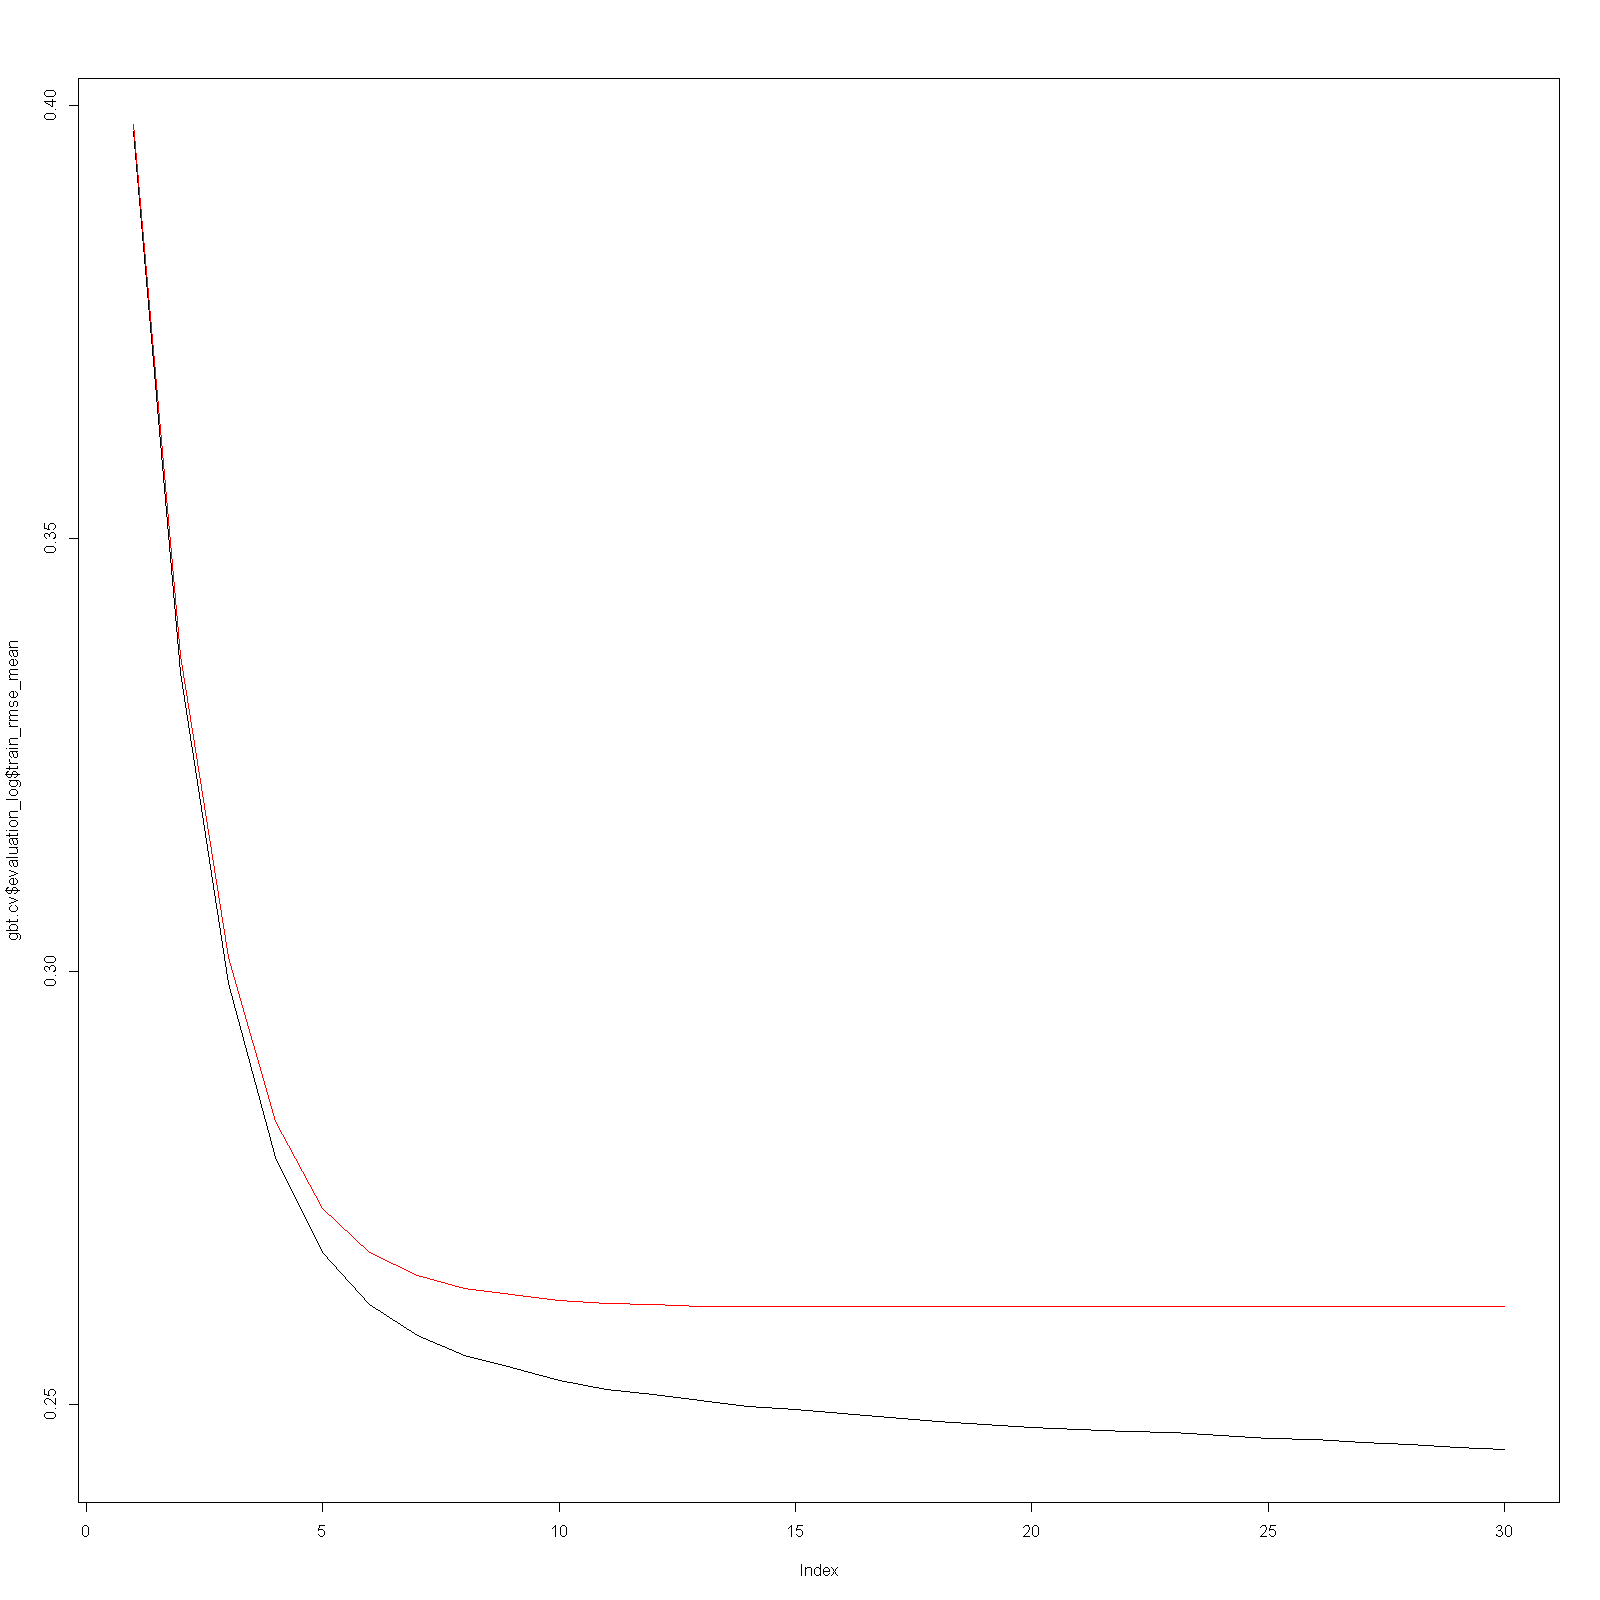

In [462]:
plot(gbt.cv$evaluation_log$train_rmse_mean, type = 'l')
lines(gbt.cv$evaluation_log$test_rmse_mean, col = 'red')
nround = which(gbt.cv$evaluation_log$test_rmse_mean == 
                 min(gbt.cv$evaluation_log$test_rmse_mean)) # 11

In [463]:
gbt <- xgboost(data = feature.matrix, 
               label = train.label,
               nround = nround,
               params = par)

[1]	train-rmse:0.397145 
[2]	train-rmse:0.334875 
[3]	train-rmse:0.299131 
[4]	train-rmse:0.279269 
[5]	train-rmse:0.268389 
[6]	train-rmse:0.262403 
[7]	train-rmse:0.258578 
[8]	train-rmse:0.256486 
[9]	train-rmse:0.255036 
[10]	train-rmse:0.253978 
[11]	train-rmse:0.253199 
[12]	train-rmse:0.252575 
[13]	train-rmse:0.252195 
[14]	train-rmse:0.251571 
[15]	train-rmse:0.251277 
[16]	train-rmse:0.250800 
[17]	train-rmse:0.250429 
[18]	train-rmse:0.250017 
[19]	train-rmse:0.249643 
[20]	train-rmse:0.249409 
[21]	train-rmse:0.248930 
[22]	train-rmse:0.248520 


# Averaging Ensemble

In [485]:
predict_models = predict_logit + predict_loan_status_tree + predict_loan_status_rf_2 + predict_loan_status_xgb
predict_loan_status_ensemble = predict_models / 4
predict_loan_status_ensemble = as.vector(predict_loan_status_ensemble)
#convert the ensemble predictor into numeric vector

In [471]:
rocCurve_ensemble = roc(response = test$fully_paid, predictor = predict_loan_status_ensemble)

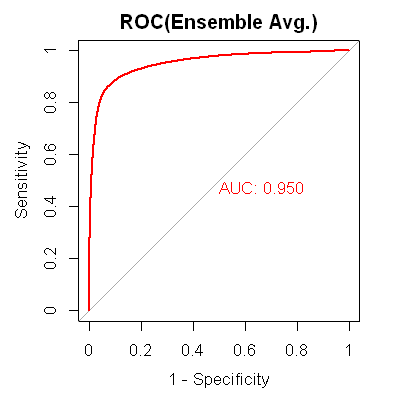

In [472]:
auc_curve = auc(rocCurve_ensemble)
plot(rocCurve_ensemble,legacy.axes = TRUE,print.auc = TRUE,col="red",main="ROC(Ensemble Avg.)")